# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (24)

**04/03/2024**

# Análisis de series temporales (Time Series)

El análisis de series temporales (___Time Series Analysis___) es el estudio de puntos de datos recopilados a lo largo del tiempo, normalmente en intervalos fijos. El objetivo es comprender los __patrones__ y __tendencias__ subyacentes en los datos y utilizar esta información para hacer __predicciones__ sobre valores futuros.

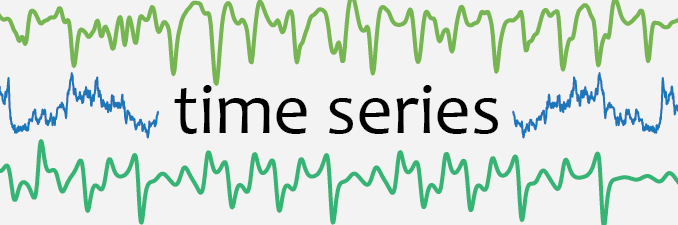

Para realizar un análisis de series temporales en _Python_, generalmente podemos usar ***pandas*** para cargar, manipular y visualizar los datos, y la librería ***statsmodels*** para aplicar diferentes técnicas comunes como el **análisis de tendencias**, el **análisis de estacionalidad** y de **autocorrelacións** que nos sirven de ayuda de cara a la creación y evaluación de **modelos predictivos**.

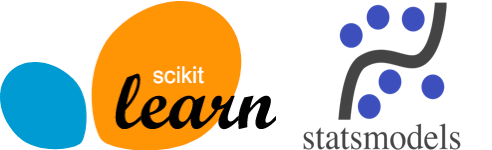

In [2]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Airline Passenger Dataset

Importamos los datos del ejemplo disponible en la librería _statsmodels_

In [4]:
import statsmodels.api as sm

# Cargar el dataset
df_air = sm.datasets.get_rdataset('AirPassengers').data

print("Tipo de dataset:", type(df_air))
df_air

Tipo de dataset: <class 'pandas.core.frame.DataFrame'>


,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


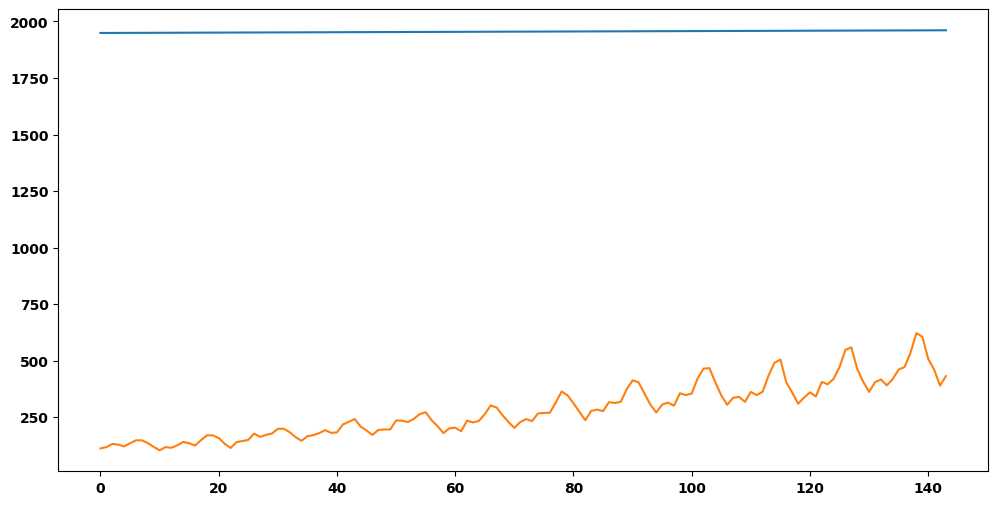

In [5]:
plt.plot(df_air)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


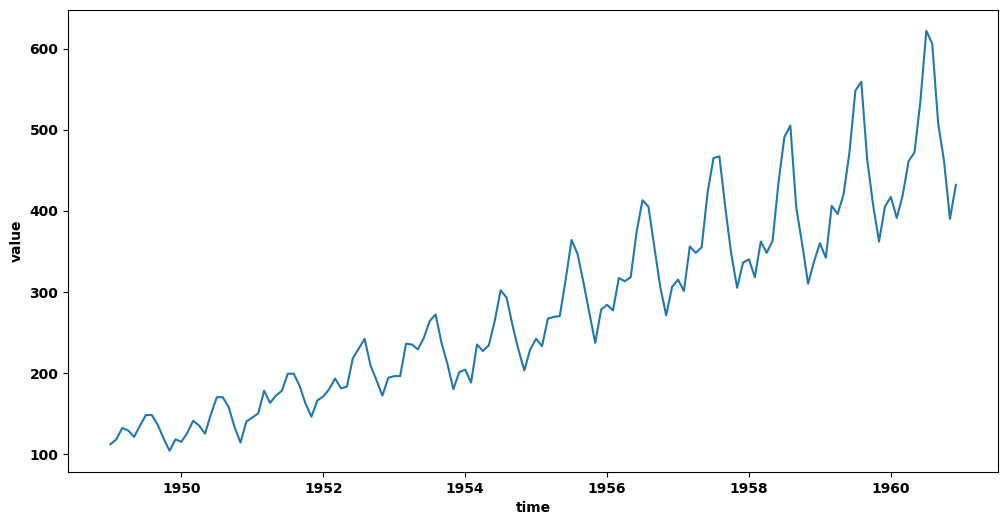

In [6]:
sns.lineplot(data=df_air, x='time', y='value')
plt.show()

Como podemos observar, la columna _`time`_ contiene los marcadores mensuales:

In [7]:
display(df_air['time'])
print(1/12, 2/12, 3/12, '...')

0      1949.000000
1      1949.083333
2      1949.166667
3      1949.250000
4      1949.333333
          ...     
139    1960.583333
140    1960.666667
141    1960.750000
142    1960.833333
143    1960.916667
Name: time, Length: 144, dtype: float64

0.08333333333333333 0.16666666666666666 0.25 ...


Una técnica común consiste en convertir o definir el tiempo registrado o los _timestamps_ en un objeto _pandas **DatetimeIndex**_, lo que nos permite realizar operaciones basadas en el tiempo, y tener los índices para cambiar o manipular fácilmente los datos de la serie temporal.

Viendo el contenido de la columna _`time`_, creamos un objeto _DatetimeIndex_ usando la función `pd.date_range()`, que genera un rango de fechas con una frecuencia mensual (`freq='MS'`) entre la fecha de inicio de `'1949-01-01'` y la fecha de finalización de `'1960-12-01'`.

In [8]:
# Definir un rango de fechas con pasos fijos
fechas = pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS')

# Asignar a las fechas como los índices del DataFrame
df_air.set_index(fechas, inplace=True)

# Quitar la columna 'time' de la tabla
df_air.drop(columns='time', inplace=True)

df_air

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


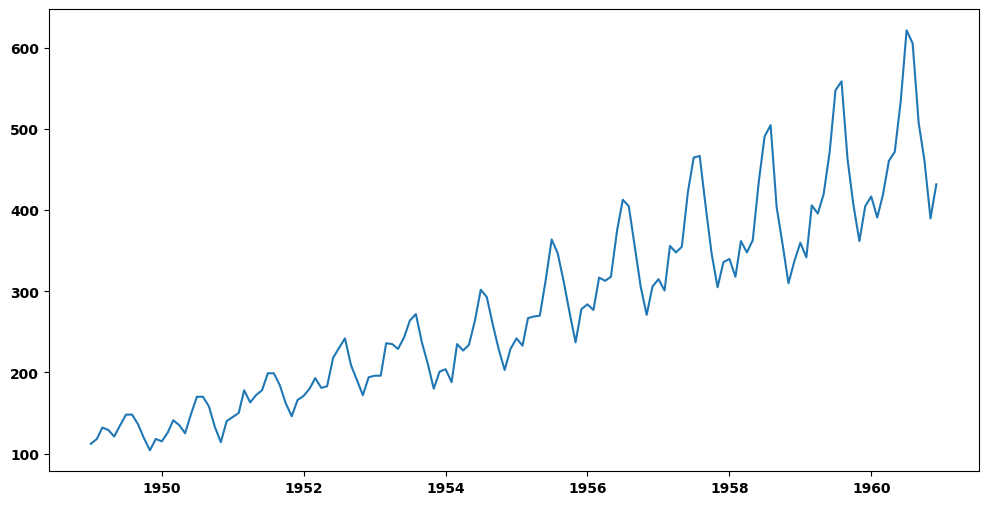

In [9]:
# Visualizamos los datos preparados
plt.plot(df_air)
plt.show()

La gráfica de una serie temporal como otros conjuntos de datos está formado por puntos, a pesar de que se visualizan habitualmente de forma de líneas. 

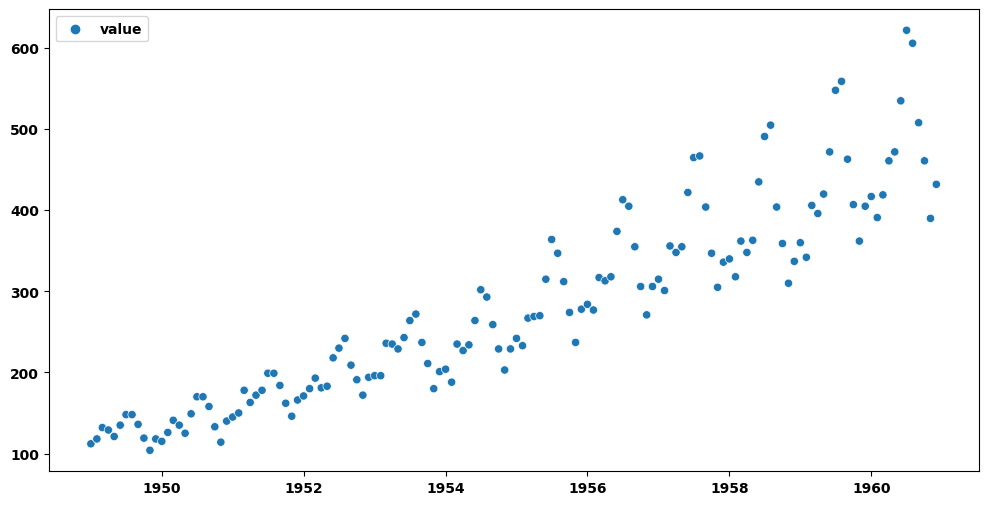

In [10]:
# Gráfico de puntos de datos
sns.scatterplot(data=df_air)
plt.show()

In [11]:
# Consultar los índices creados
df_air.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

Otra forma de cargar los datos de este ejemplo es mediante la librería ___seaborn___

In [12]:
import seaborn as sns
import pandas as pd

# Cargar el dataset de "flights"
df_flight = sns.load_dataset('flights')

print("Tipo de dataset:", type(df_flight))
df_flight

Tipo de dataset: <class 'pandas.core.frame.DataFrame'>


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [13]:
# Consultar la información del dataset descargado
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


Vemos que este dataset contiene mismos valores, pero el tiempo viene registrado en forma de **_año_ y _mes_ por separado**. En este caso podemos juntar esta información en una nueva columna y convertirla en ___DatetimeIndex___

In [14]:
# Crear una nueva columna con la unificación de otras dos
df_flight['year_month'] = df_flight.apply(lambda x: str(x['year']) + '-' + x['month'], axis=1)

df_flight

,year,month,passengers,year_month
0,1949,Jan,112,1949-Jan
1,1949,Feb,118,1949-Feb
2,1949,Mar,132,1949-Mar
3,1949,Apr,129,1949-Apr
4,1949,May,121,1949-May
...,...,...,...,...
139,1960,Aug,606,1960-Aug
140,1960,Sep,508,1960-Sep
141,1960,Oct,461,1960-Oct
142,1960,Nov,390,1960-Nov


In [15]:
# Convertir la columna en fechas tipo DatetimeIndex
df_flight['fechas'] = pd.to_datetime(df_flight['year_month'], format='%Y-%b')

# Convertir la columna de fechas a los índices del DataFrame
df_flight.set_index('fechas', inplace=True)

# Quitar las columnas no necesarias
df_flight.drop(columns=['year', 'month', 'year_month'], inplace=True)

df_flight

,passengers
fechas,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


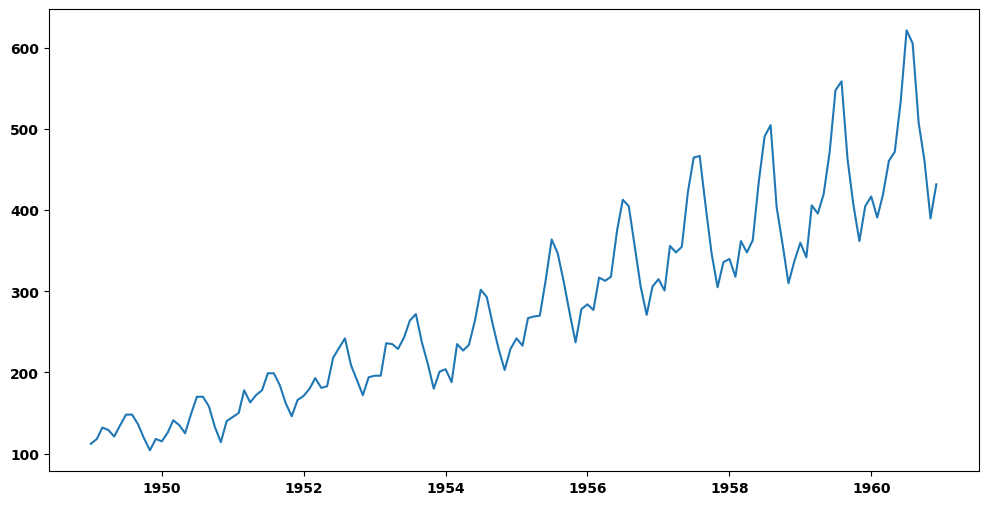

In [16]:
# Visualizar el DataFrame
plt.plot(df_flight)
plt.show()

Vamos a comprobar si las dos formas de cargar y tratar los datos nos han llevado al mismo Dataset:

In [17]:
# Consultar las dos tablas
display(df_air)
display(df_flight)

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


,passengers
fechas,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Para comparar dos _DataFrames_ podemos usar el método `.equals()` que nos permite comprobar si dos objetos de este tipo son **exactamente identicos** o no:

In [18]:
# Comparar las dos tablas (DataFrames)
df_air.equals(df_flight)

False

Sabemos que la **diferencia** está en los **nombres de las columnas** y el **índice** y **no en el contenido**. Podemos utilizar la función `array_equal()` de _numpy_ para asegurarnos que los dos tablas contienen la misma información:

In [19]:
# Consultar las valores
display(df_air.values[0:4])
display(df_flight.values[0:4])

array([[112],
       [118],
       [132],
       [129]], dtype=int64)

array([[112],
       [118],
       [132],
       [129]], dtype=int64)

In [20]:
# Comparar los valores
np.array_equal(df_air.values, df_flight.values)

True

In [21]:
display(df_air.index)
display(df_flight.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='fechas', length=144, freq=None)

In [22]:
# Comparar los índices
np.array_equal(df_air.index, df_flight.index)

True

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

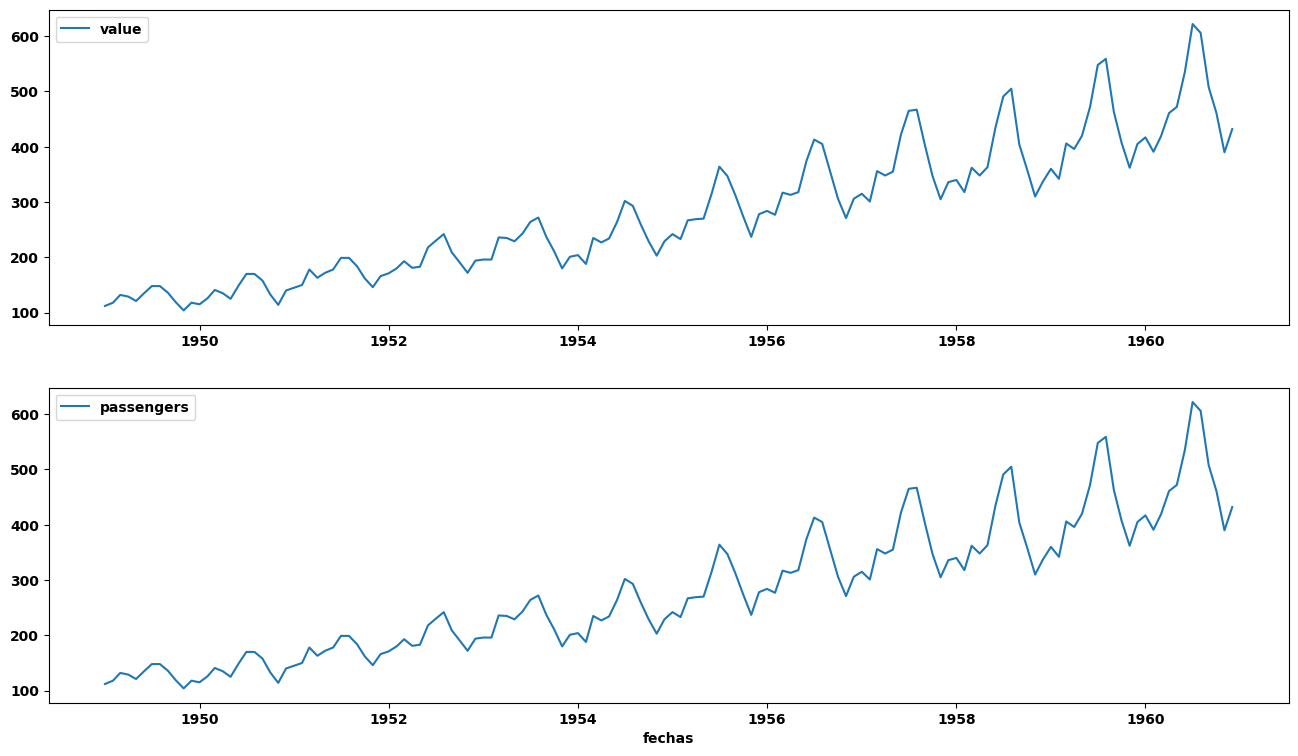

In [23]:
# Comparación visual
fig, axes = plt.subplots(2,1, figsize=(16,9))
sns.lineplot(data=df_air, ax=axes[0])
sns.lineplot(data=df_flight, ax=axes[1])
plt.show()

De las principales ventajas de tener los tiempos registrados como un objeto _DatetimeIndex_ podemos mencionar:
- **Resampling**
- **Time-based slicing**
- **Time zone handling** 

,value
1949-12-31,126.666667
1950-12-31,139.666667
1951-12-31,170.166667
1952-12-31,197.000000
1953-12-31,225.000000
1954-12-31,238.916667
1955-12-31,284.000000
1956-12-31,328.250000
1957-12-31,368.416667
1958-12-31,381.000000


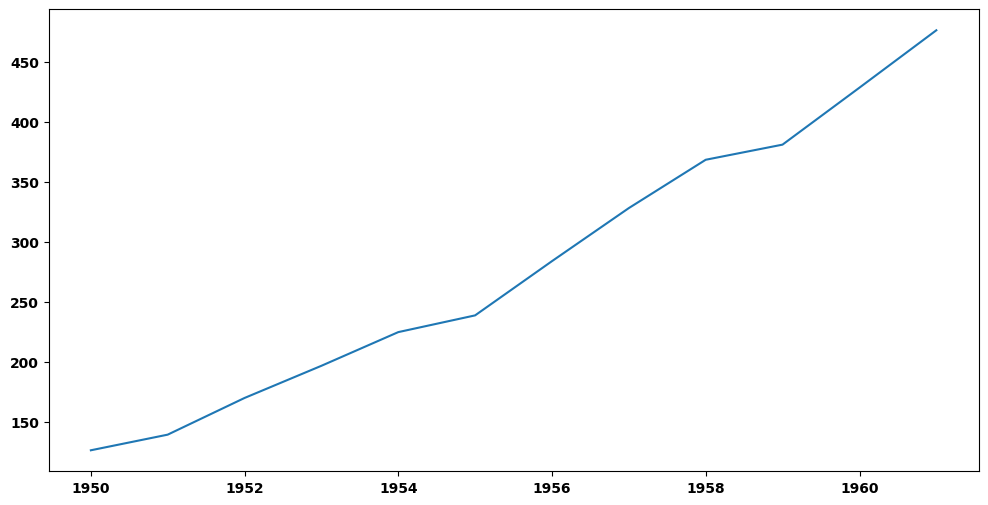

In [24]:
## Resampling
# Podemos hacer un remuestreo por ejemplo para agrupar los datos por año, promediando los valores mensuales
df_air_anual = df_air.resample('Y').mean()
display(df_air_anual)
plt.plot(df_air_anual)
plt.show()

In [25]:
## Time-based slicing
# Podemos seleccionar fácilmente los registros en un intervalo concreto entre dos fechas por ejemplo
df_air['1954-03-30':'1955-02-10']

,value
1954-04-01,227
1954-05-01,234
1954-06-01,264
1954-07-01,302
1954-08-01,293
1954-09-01,259
1954-10-01,229
1954-11-01,203
1954-12-01,229
1955-01-01,242


In [26]:
## Time zone handling
# Podemos llevar la hora internacional (UTC) a nuestra zona horaria local "Central European Time (CET)"
df_air.tz_localize('Europe/Madrid', ambiguous='NaT')

,value
1949-01-01 00:00:00+01:00,112
1949-02-01 00:00:00+01:00,118
1949-03-01 00:00:00+01:00,132
1949-04-01 00:00:00+01:00,129
1949-05-01 00:00:00+02:00,121
...,...
1960-08-01 00:00:00+01:00,606
1960-09-01 00:00:00+01:00,508
1960-10-01 00:00:00+01:00,461
1960-11-01 00:00:00+01:00,390


### Visualización más avanzada y dinámica con plotly

**[plotly](https://plotly.com/python/)** es una librería popular de visualización de datos de código abierto en _Python_, _R_ y otros lenguajes de programación que permite crear gráficos y Dashboards totalmente **interactivos**, lo que permite a los usuarios acercar y alejar, desplazar y pasar el ratón sobre los puntos de datos para ver más información.  

_Plotly_ Proporciona una **amplia gama de tipos de gráficos** y opciones de **personalización**, lo que la convierte en una herramienta versátil para la visualización de datos.

In [27]:
# Las gráficas interactivas ayudan bastante a los analistas de datos,
# sobre todo a la hora de analizar y explorar las series temporales
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_air.index,
    y=df_air['value'],
    mode="markers+lines"
    ))

fig.update_layout(title="Número de pasajeros aéreos de cada mes desde el año 1949 hasta 1960",
                  title_font_size=26,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Pasajeros'
                  )

fig.show()

### Analizar la estacionalidad

El análisis de estacionalidad (___Seasonality analysis___) es el proceso de **identificar patrones** en los datos que **se repiten durante intervalos fijos de tiempo**, por ejemplo en un **año** o un **trimestre**. Esto implica examinar los datos de la serie temporal para determinar si existen **ciclos regulares** o patrones que ocurren dentro de los datos durante un **período específico**. Esto puede ayudar a predecir tendencias futuras y a tomar decisiones basadas en los datos históricos.

En este ejemplo podemos mirar como los datos muestran una **periodicidad anual** por poseer una **estacionalidad considerable** sobre los niveles de datos mensuales.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



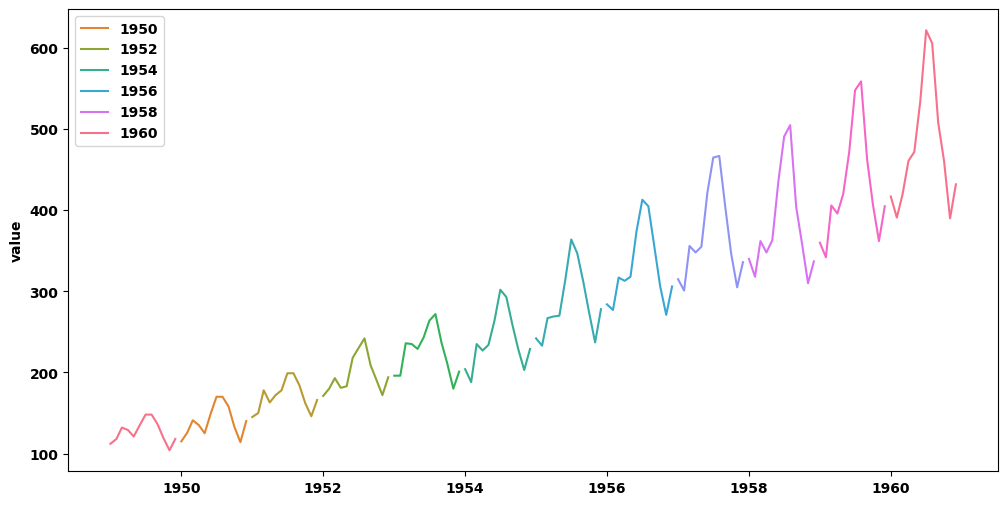

In [28]:
# Podemos directamente pintar los datos por tramos anuales
sns.lineplot(data=df_air, x=df_air.index, y=df_air['value'], hue=df_air.index.year, palette='husl')
plt.show()

#### Graficar el _Seasonal plot_

Una técnica común para estudiar y explorar los patrones estacionales en los datos es sacar el ___Seasonal plot___ que consiste en **superponer** las gráficas que visualizan la **evolución de los datos en el periodo marcado** por la estacionalidad. 

In [29]:
# Crear una tabla pivotada en base a la columna que contiene los datos estacionales
df_piv = pd.pivot_table(df_air,                      # Dataframe principal
                        index=df_air.index.month,    # Las unidades del eje horizontal
                        columns=df_air.index.year,   # El periodo estacional
                        values=['value'])            # La columna que contiene los datos dentro del DataFrame
df_piv

value                                                                 \
     1949   1950   1951   1952   1953   1954   1955   1956   1957   1958   
1   112.0  115.0  145.0  171.0  196.0  204.0  242.0  284.0  315.0  340.0   
2   118.0  126.0  150.0  180.0  196.0  188.0  233.0  277.0  301.0  318.0   
3   132.0  141.0  178.0  193.0  236.0  235.0  267.0  317.0  356.0  362.0   
4   129.0  135.0  163.0  181.0  235.0  227.0  269.0  313.0  348.0  348.0   
5   121.0  125.0  172.0  183.0  229.0  234.0  270.0  318.0  355.0  363.0   
6   135.0  149.0  178.0  218.0  243.0  264.0  315.0  374.0  422.0  435.0   
7   148.0  170.0  199.0  230.0  264.0  302.0  364.0  413.0  465.0  491.0   
8   148.0  170.0  199.0  242.0  272.0  293.0  347.0  405.0  467.0  505.0   
9   136.0  158.0  184.0  209.0  237.0  259.0  312.0  355.0  404.0  404.0   
10  119.0  133.0  162.0  191.0  211.0  229.0  274.0  306.0  347.0  359.0   
11  104.0  114.0  146.0  172.0  180.0  203.0  237.0  271.0  305.0  310.0   
12  118.0  140.0  166.0  194.0  201.0  229.0  278.0  306.0  336.0  337.0   

                  
     1959   1960  
1   360.0  417.0  
2   342.0  391.0  
3   406.0  419.0  
4   396.0  461.0  
5   420.0  472.0  
6   472.0  535.0  
7   548.0  622.0  
8   559.0  606.0  
9   463.0  508.0  
10  407.0  461.0  
11  362.0  390.0  
12  405.0  432.0

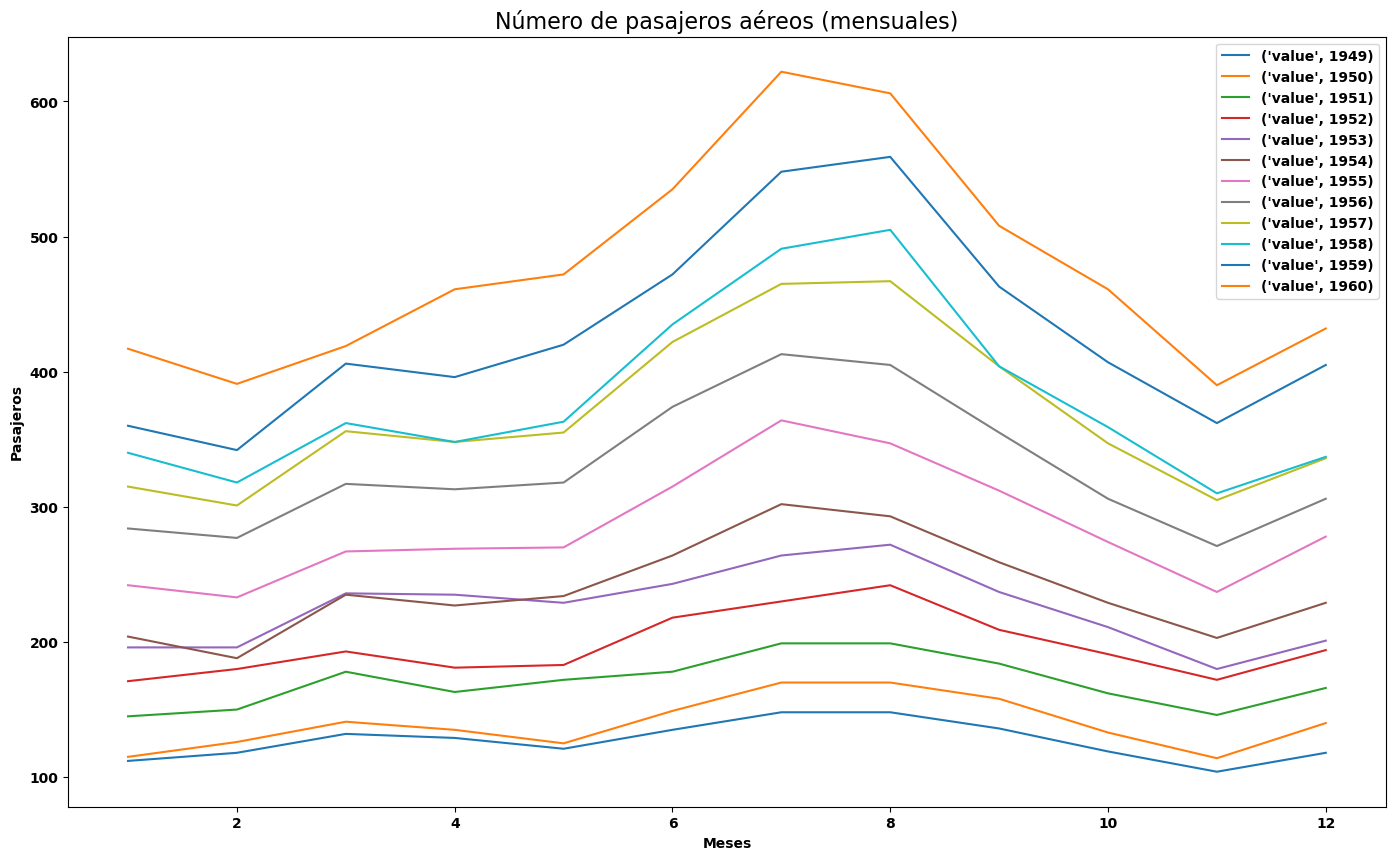

In [30]:
plt.figure(figsize=(17,10))
plt.plot(df_piv, label=df_piv.columns)
plt.title('Número de pasajeros aéreos (mensuales)', fontsize=16)
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.legend(loc='upper right')
plt.show()

La otra alternativa sería graficar con la librería _seaborn_ todas las columnas mediante un bucle para llegar a tener el gráfico de _seasonal plot_.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

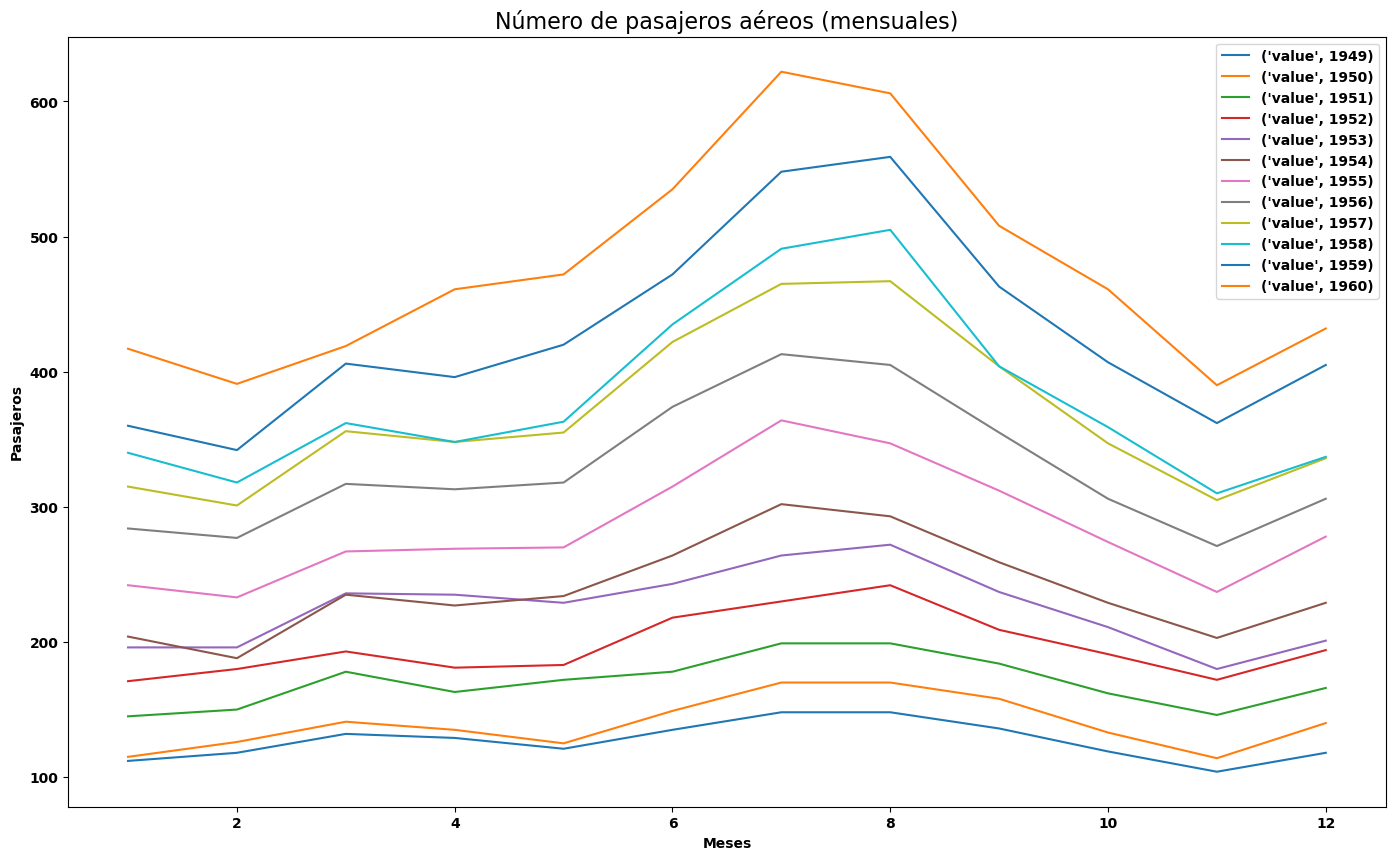

In [31]:
plt.figure(figsize=(17,10))

# Un bucle para dibujar las columnas que corresponden a cada año
for col in range(df_piv.shape[1]):
    sns.lineplot(data=df_piv, x=df_piv.index, y=df_piv.iloc[:,col].values, label=df_piv.columns[col])

plt.title('Número de pasajeros aéreos (mensuales)', fontsize=16)
plt.xlabel('Meses')
plt.ylabel('Pasajeros')
plt.legend(loc='upper right')

plt.show()

Como muestra el gráfico de _seasonal plot_, este dataset cuenta con un **componente estacional** que innegablemente afecta a los números de pasajeros aéreos en función del mes de año, muy probablamente por los **periodos vacacionales**, el **clima** y los **ciclos económicos** a lo largo de un año.

### Descomposición de la serie temporal 

Otra técnica usada ampliamente en el análisis de la estacionalidad de una serie temporal es la descomposición de la misma o el ___Time series decomposition___ que pretende descomponer una serie temporal en sus **componentes subyacentes (_tendencia_, _estacional_ y _residual_)** con el fin de comprender y analizar mejor los datos. Los tres componentes de la descomposición de series de tiempo son:

- **Trend** (_tendencia_) : esta es la **dirección a largo plazo** en la que se mueve la serie temporal. Captura el comportamiento general de la serie durante un largo período de tiempo. Puede ser **creciente**, **decreciente** o **plano**.

- **Seasonality** (_estacionalidad_): Este es el **patrón de fluctuaciones recurrentes** o ciclos en la serie de tiempo que se repiten a intervalos regulares.

- **Residual**: Esta es la **variación aleatoria** en la serie de tiempo que no puede explicarse por la tendencia o la estacionalidad. Representa el **ruido o error** en los datos.

La descomposición de series temporales se puede realizar utilizando dos enfoques diferentes:  
- Descomposición **aditiva**:  La serie temporal se descompone en la **suma de sus componentes** de tendencia, estacionalidad y residuos.
- Descomposición **multiplicativa**:  La serie temporal se descompone en el **producto de sus componentes** de tendencia, estacionalidad y residuos.

Una vez que se descompone la serie temporal, cada componente se puede analizar por separado para obtener información sobre los datos. Por ejemplo, el componente de **tendencia** se puede usar para identificar **patrones a largo plazo** o cambios incrementales en los datos, mientras que el componente **estacional** se puede usar para identificar **ciclos regulares** o patrones en los datos. 

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_air_des = seasonal_decompose(df_air, model='additive')

print(type(df_air_des))
print(type(df_air_des.trend))

display(df_air_des.trend[100:105])
display(df_air_des.seasonal[100:105])
display(df_air_des.resid[100:105])

<class 'statsmodels.tsa.seasonal.DecomposeResult'>
<class 'pandas.core.series.Series'>


1957-05-01    364.500000
1957-06-01    367.166667
1957-07-01    369.458333
1957-08-01    371.208333
1957-09-01    372.166667
Freq: MS, Name: trend, dtype: float64

1957-05-01    -4.506313
1957-06-01    35.402778
1957-07-01    63.830808
1957-08-01    62.823232
1957-09-01    16.520202
Freq: MS, Name: seasonal, dtype: float64

1957-05-01    -4.993687
1957-06-01    19.430556
1957-07-01    31.710859
1957-08-01    32.968434
1957-09-01    15.313131
Freq: MS, Name: resid, dtype: float64

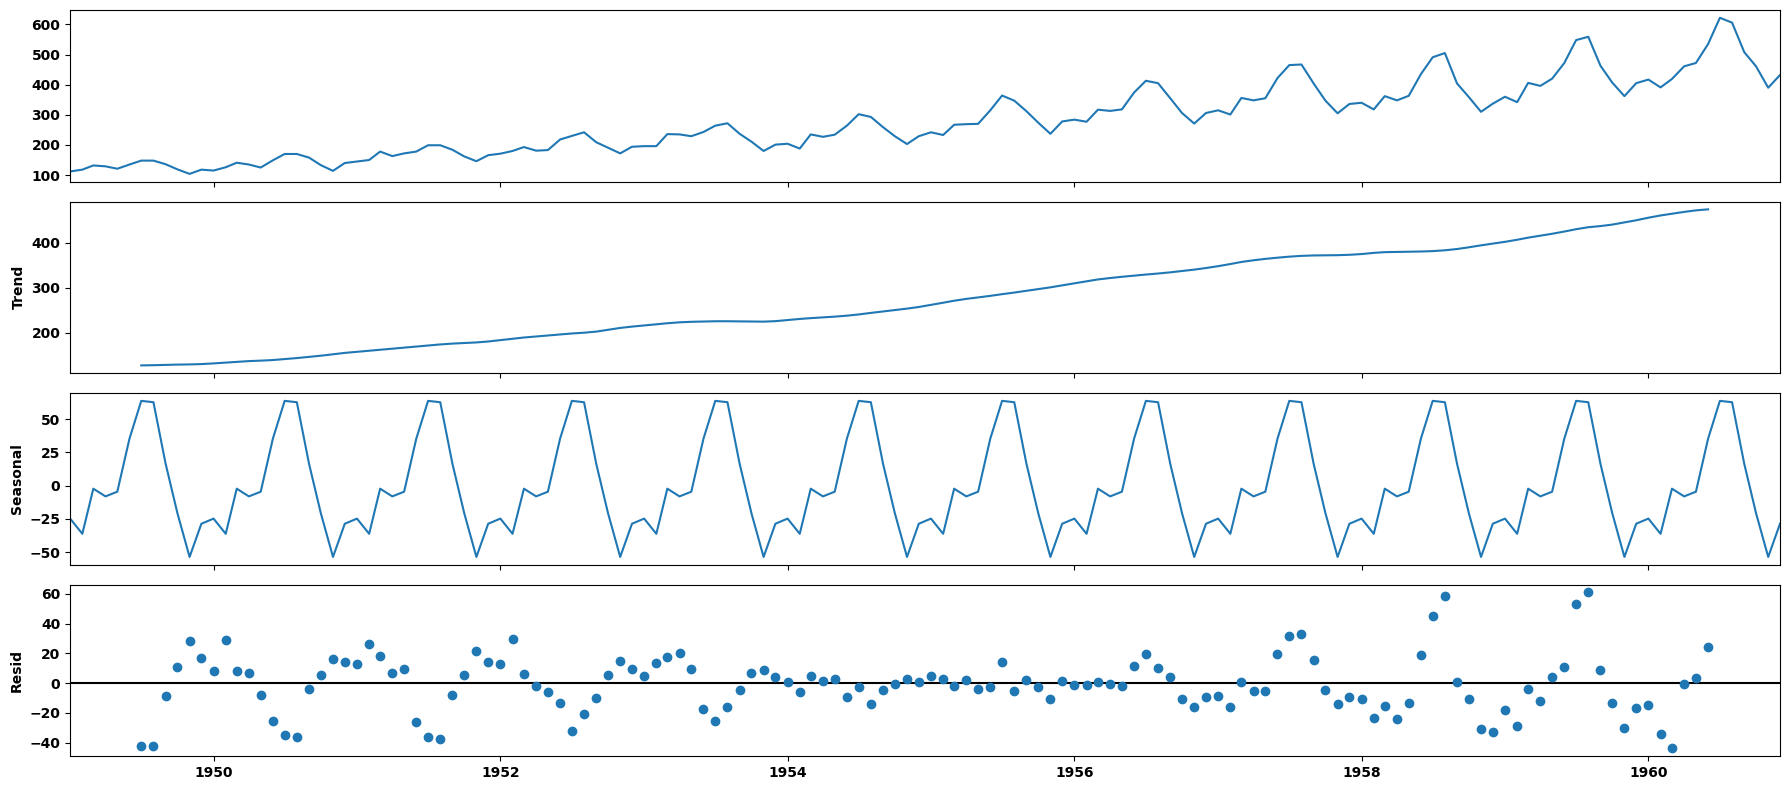

In [33]:
# Establecer el tamaño de la imégen
rcParams['figure.figsize'] = 18, 8

# Graficar la descomposición de la serie temporal
df_air_des.plot()
plt.show()

# Podemos volver a resetear los tamaños a los valores por defecto
# plt.rcdefaults()

Ahora sumamos la tendencia y el componente estacional para observar los patrones extraídos con esta descomposición:

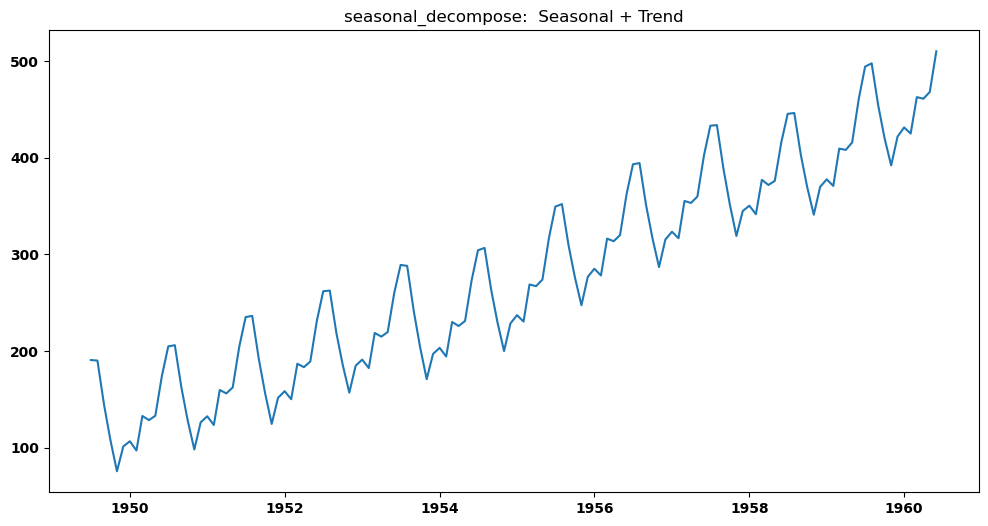

In [34]:
rcParams['figure.figsize'] = 12, 6
plt.plot(df_air_des.seasonal + df_air_des.trend)
plt.title("seasonal_decompose:  Seasonal + Trend")
plt.show()

Al visualizar el periodo anual mediante _`seasonal plot`_ sabemos que el **patrón estacional tiene una forma cada vez más estirada**. Se puede observar que **al fijar la forma de componente estacional**, la evolución de la serie temporal **no se refleja correctamente** en la suma de estos dos componentes. Visualizamos mejor el componente residual que contiene la parte no explicada de la serie:

count    132.00
mean      -0.75
std       19.34
min      -43.97
25%      -11.25
50%       -0.45
75%        9.53
max       61.05
Name: resid, dtype: float64

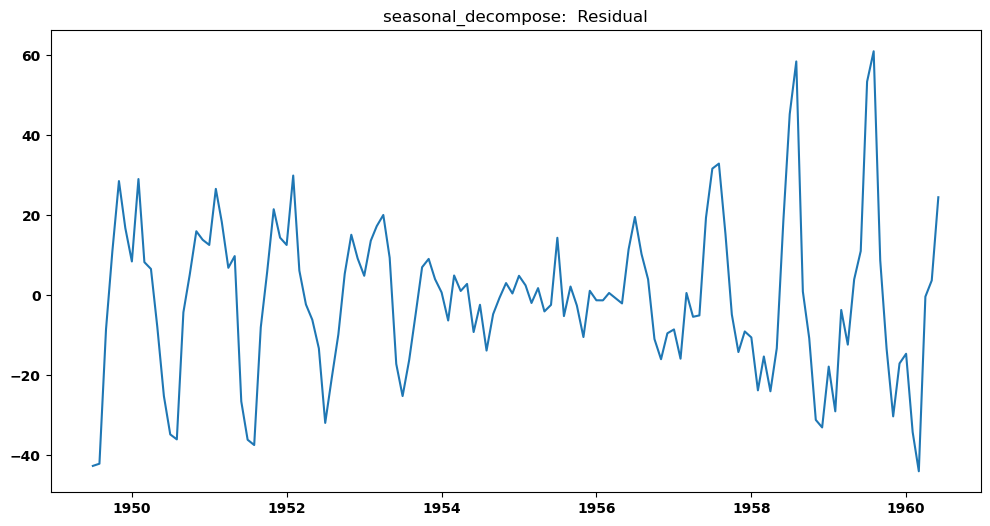

In [35]:
display(df_air_des.resid.describe().round(2))
plt.plot(df_air_des.resid)
plt.title("seasonal_decompose:  Residual")
plt.show()

Vemos que claramente hay un **comportamiento periódico** en estos datos que indica que todavía **queda una parte de información** que no se ha llegado a explotar.

#### Seasonal and Trend decomposition using Loess (_STL_)

La descomposición de tendencia estacional mediante Loess (**STL**) es un método avanzado de descomposición de series temporales que utiliza **modelos de regresión** ajustados localmente para descomponer una serie temporal en componentes de tendencia, estacionales y restantes, permitiendo la **flexibilidad** para el componente **estacional**. 

In [36]:
# Descomponer la serie y graficarla
from statsmodels.tsa.seasonal import STL
df_air_stl = STL(df_air['value']).fit()

display(df_air_stl.trend[100:105])
display(df_air_stl.seasonal[100:105])
display(df_air_stl.resid[100:105])


1957-05-01    362.549878
1957-06-01    365.442286
1957-07-01    367.914134
1957-08-01    369.922568
1957-09-01    371.519830
Freq: MS, Name: trend, dtype: float64

1957-05-01    -8.787448
1957-06-01    50.096347
1957-07-01    96.438865
1957-08-01    95.091653
1957-09-01    22.325092
Freq: MS, Name: season, dtype: float64

1957-05-01     1.237570
1957-06-01     6.461367
1957-07-01     0.647002
1957-08-01     1.985779
1957-09-01    10.155078
Freq: MS, Name: resid, dtype: float64

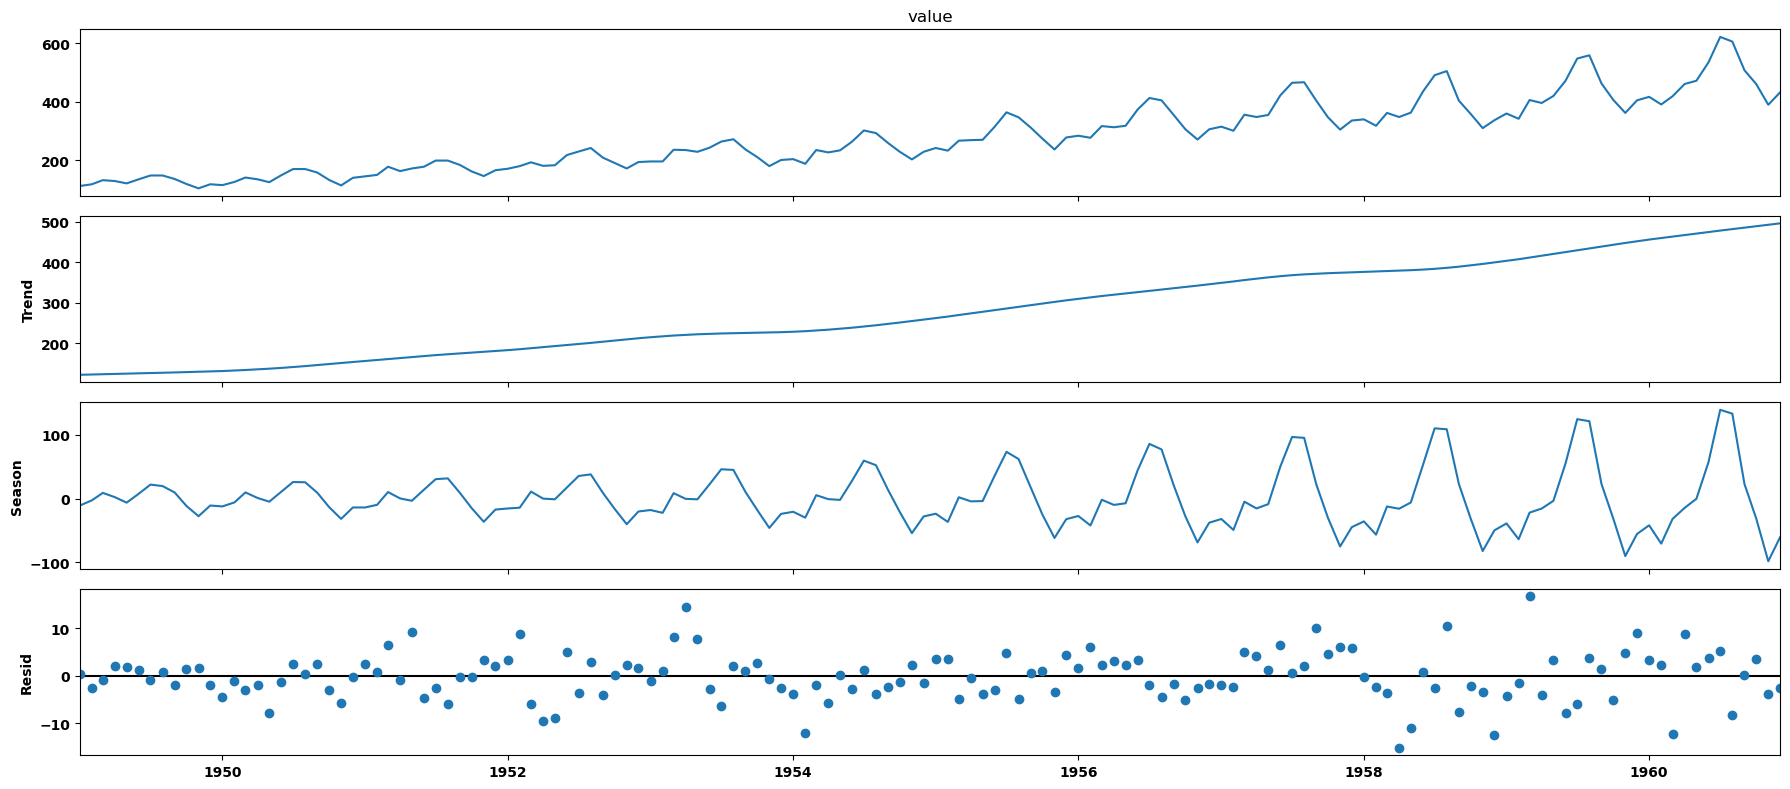

In [37]:
# Establecer el tamaño de la imégen
rcParams['figure.figsize'] = 18, 8

# Graficar la descomposición de la serie temporal
df_air_stl.plot()
plt.show()

# Podemos volver a resetear los tamaños a los valores por defecto
# plt.rcdefaults()

Se puede apreciar que el componente **estacional** tiene **una ampliación a lo largo de tiempo** que es más ajustado a la realidad. Esto hace que la suma de los dos componentes represente **un comportamiento similar a la de serie** temporal.

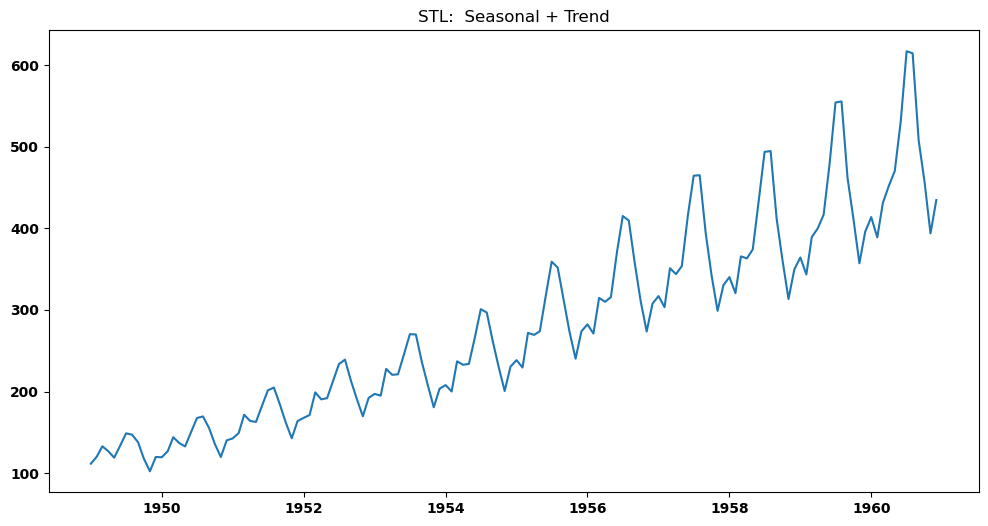

In [38]:
rcParams['figure.figsize'] = 12, 6
plt.plot(df_air_stl.seasonal + df_air_stl.trend)
plt.title("STL:  Seasonal + Trend")
plt.show()

Por consiguiente los valores residuales **no presentan un comportamiento o un patrón concreto**. Son valores **más pequeños** y mustran **más aleatoriedad** que la descomposición anterior.

count    144.00
mean      -0.17
std        5.05
min      -15.12
25%       -2.93
50%       -0.18
75%        2.47
max       16.73
Name: resid, dtype: float64

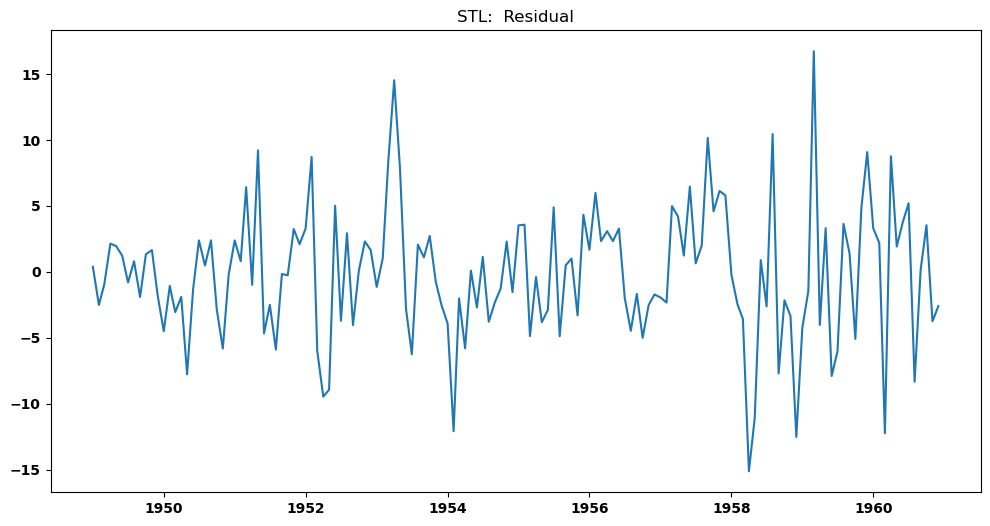

In [39]:
display(df_air_stl.resid.describe().round(2))
plt.plot(df_air_stl.resid)
plt.title("STL:  Residual")
plt.show()

### Análisis de autocorrelación

La autocorrelación (___Autocorrelation___) mide un conjunto de valores actuales contra un conjunto de valores pasados de una serie para ver **si se correlacionan** o no. Entonces, en lugar de medir la correlación entre dos variables aleatorias, estamos midiendo la **correlación entre una variable aleatoria contra sí misma**.

A continuación vamos a calcular la correlación entre dos vectores para tenerlo más claro:

In [40]:
# Calcular mediante "pandas" el coeficiente de correlación linear entre dos Series (Pearson’s r)
A = pd.Series([1, 2, 3, 4, 5])
B = pd.Series([10, 20, 30, 40, 50])
C = pd.Series([-10, -20, -30, -40, -50])

X = pd.Series([99, -0.05, 100006.3, 888, 0.025])

print("La correlación entre A y B = ", A.corr(B))
print("La correlación entre A y C = ", A.corr(C))
print("La correlación entre A y X = ", A.corr(X))

La correlación entre A y B =  1.0
La correlación entre A y C =  -1.0
La correlación entre A y X =  0.0024456673941348475


Podemos ver que la correlación (en este ejemplo de tipo _Pearson_) es la **fuerza con la que dos variables están relacionadas entre sí**. Si el valor es **+1** las variables están perfectamente **correlacionadas de manera positiva**, y si es **-1** están perfectamente **correlacionadas de manera negativa** y en caso de ser igual a **0** quiere decir que **no hay correlación**.

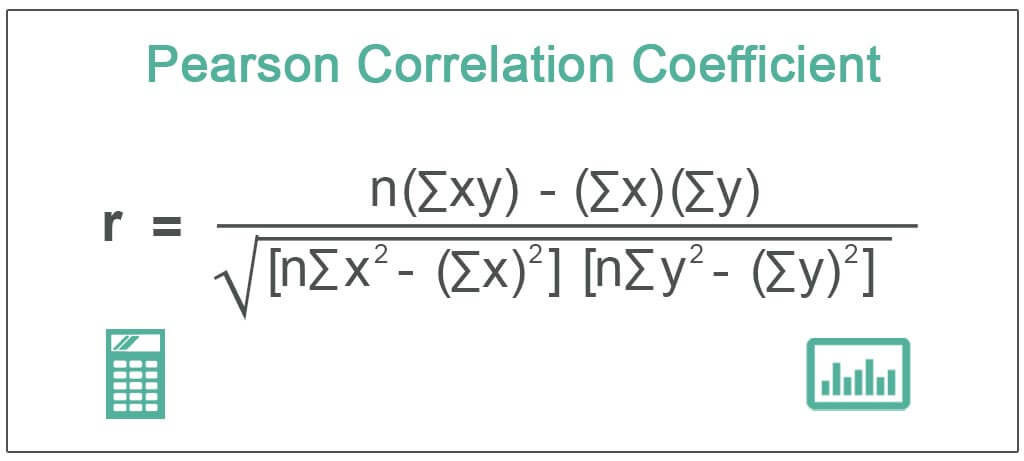

Podemos calcular la correlación de las observaciones de una serie temporal con observaciones anteriores, llamados retrasos (___lags___). Debido a que la correlación de las observaciones de la serie temporal se calcula con valores de la misma serie en momentos anteriores, esto se denomina **correlación serial** o ***autocorrelación***.

La gráfica de la autocorrelación de una serie temporal se denomina **función de autocorrelación**, o el acrónimo ***ACF (Auto Correlation Function)***. Esta gráfica a veces se denomina **correlograma**:

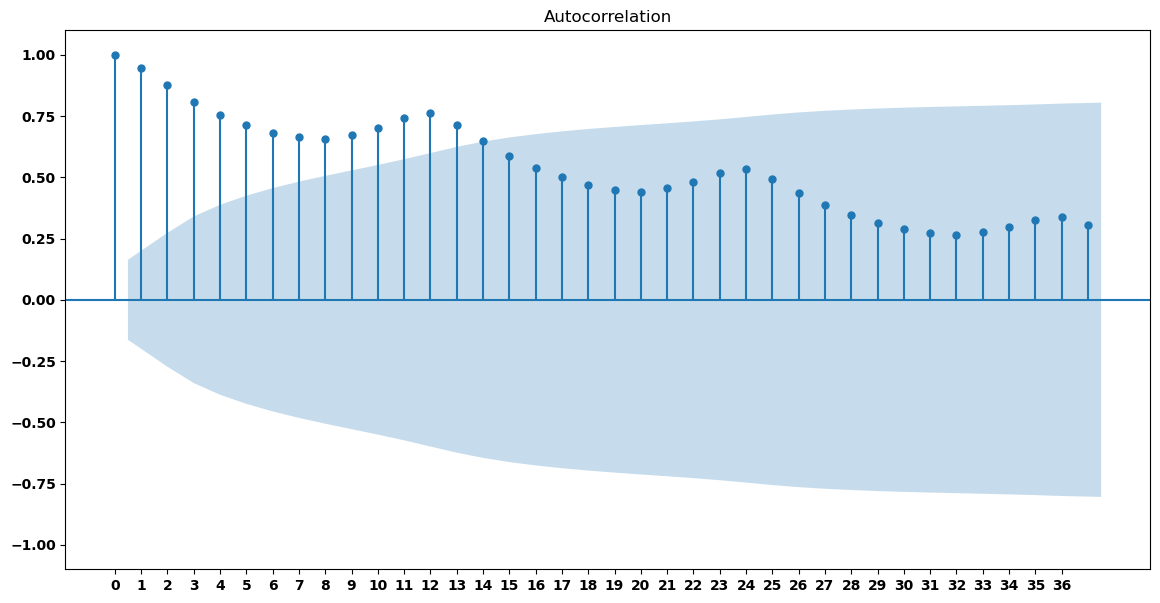

In [41]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_air, lags=37)
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

Fijandonos en la evolución de los coeficientes de correlación para cada _lag_, vemos que:  

- El _lag_ 0 tiene una correlación perfecta igual a 1 porque representa la **correlación de la serie temporal con una copia exacta de sí misma**.  

- Hay un **patrón cíclico** evidente cada **múltiplo de 12**, confirmando que tenemos una **estacionalidad anual** en nuestros datos.  

- La **fuerza de la correlación se disminuye** a medida que aumentan los retrasos o los _lags_. Esto indica que tenemos una **tendencia** en nuestros datos.

##### Intervalos de confianza (_Confidence intervals_)

De forma predeterminada se establecen unos **intervalos de confianza del 95 %** que se dibujan muchas veces como un **cono** y sugieren  que los valores de correlación fuera de este cono (la región azul) son muy probablemente una correlación y **no una casualidad estadística**. Por lo tanto, al construir un modelo predictivo, esta gráfica indica que **probablemente solo debería considerar hasta el _lag_ 13** de los valores anteriores debido a sus **importancias estadísticas**.


#### Partial Autocorrelation Function (_PACF_)

Una **autocorrelación parcial** es la relación entre una serie temporal y sus observaciones en pasos de tiempo anteriores  (_lags_), **eliminando todos los efectos intermedios**.

Como _PACF_ mide **la relación directa de una observación con las observaciones anteriores**, muestra un decline para más allá de los retrasos que no tengan importancia, y por lo tanto se utiliza a menudo **para encontrar el tope de los _lags_ a considerar** a la hora de modelizar las series temporales.

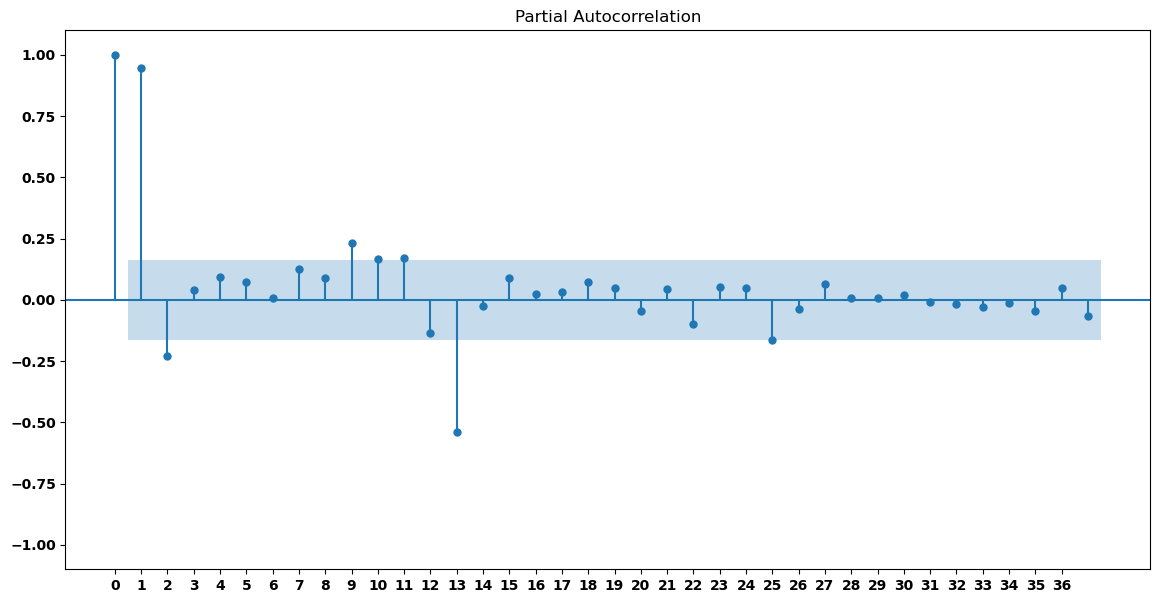

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_air, lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

### Stationarity Analysis

La **estacionariedad** significa que las **características estadísticas** de un proceso que genera una serie temporal, **no cambian con el tiempo**.  

Una serie temporal **estacionaria** es aquella **cuyas propiedades no dependen del momento en que se observa la serie**. Por lo tanto, **las series con _tendencias_ o con _estacionalidad_ no son estacionarias**.  
Por otro lado, una serie de **ruido blanco (_white noise_) es estacionaria**: no importa cuándo la observes, muestra **las mismas propiedades estadísticas** en cualquier momento.

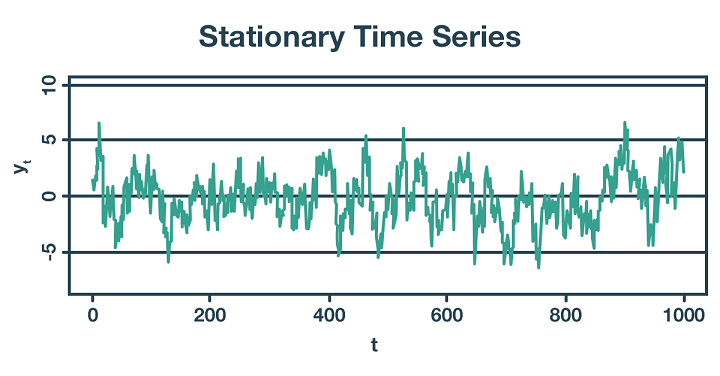

La estacionariedad (_stationarity_) es un concepto fundamental en el análisis de series temporales, porque indica que de alguna manera **la media, la varianza y la autocorrelación de una serie de tiempo estacionaria no cambia con el tiempo**.

Ahora comparamos desde este aspecto los dos **componentes residuales** calculados anteriormente, cuando **idealmente tienen que ser series estacionarias**:

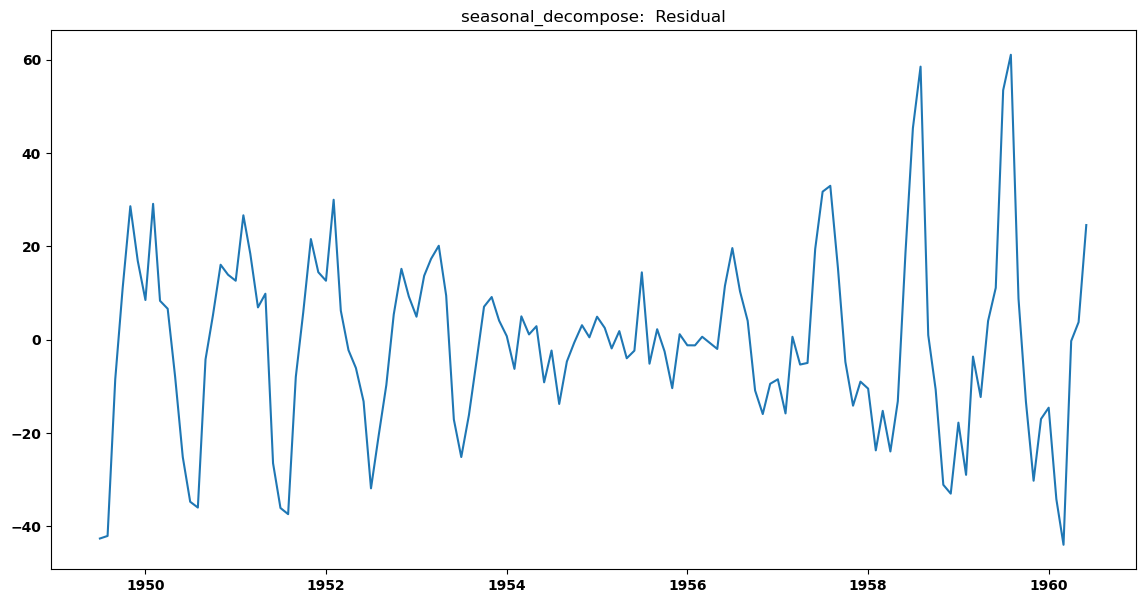

In [43]:
# Visualizamos el componente residual calculada mediante "seasonal_decompose"
plt.plot(df_air_des.resid)
plt.title("seasonal_decompose:  Residual")
plt.show()

Estudiamos las propiedades estadísticas de esta serie en varios momentos para ver su evolución a lo largo del tiempo 

In [44]:
df_resid1 = pd.DataFrame(df_air_des.resid)
df_resid1_piv = pd.pivot_table(df_resid1,
                               index=df_resid1.index.month,
                               columns=df_resid1.index.year)
df_resid1_piv

resid                                                         \
         1949       1950       1951       1952       1953       1954   
1         NaN   8.498737  12.623737  12.623737   4.915404   0.748737   
2         NaN  29.104798  26.646465  29.979798  13.688131  -6.270202   
3         NaN   8.324495  18.407828   6.199495  17.324495   4.991162   
4         NaN   6.619949   6.911616  -2.255051  20.119949   1.119949   
5         NaN  -7.910354   9.839646  -6.077020   9.422980   2.881313   
6         NaN -25.152778 -26.486111 -13.236111 -17.111111  -9.152778   
7  -42.622475 -34.747475 -36.080808 -31.872475 -25.164141  -2.330808   
8  -42.073232 -35.989899 -37.406566 -20.573232 -16.156566 -13.781566   
9   -8.478535  -4.228535  -7.978535  -9.728535  -4.478535  -4.686869   
10  11.059343   5.226010   5.809343   5.392677   7.059343  -0.607323   
11  28.593434  16.051768  21.551768  15.176768   9.135101   3.093434   
12  16.869949  13.911616  14.453283   9.244949   4.078283   0.494949   

                                                                      
         1955       1956       1957       1958       1959       1960  
1    4.915404  -1.209596  -8.501263 -10.501263 -17.792929 -14.584596  
2    2.521465  -1.228535 -15.811869 -23.728535 -28.978535 -34.186869  
3   -1.883838   0.616162   0.616162 -15.258838  -3.633838 -43.967172  
4    1.828283  -0.713384  -5.338384 -23.963384 -12.296717  -0.296717  
5   -3.993687  -1.993687  -4.993687 -13.202020   4.006313   3.756313  
6   -2.361111  11.513889  19.430556  18.638889  11.097222  24.555556  
7   14.419192  19.627525  31.710859  45.335859  53.460859        NaN  
8   -5.156566  10.343434  32.968434  58.510101  61.051768        NaN  
9    2.229798   4.021465  15.313131   0.979798   8.771465        NaN  
10  -2.523990 -10.898990  -4.773990 -10.690657 -13.315657        NaN  
11 -10.406566 -15.948232 -14.156566 -31.114899 -30.239899        NaN  
12   1.161616  -9.463384  -9.005051 -33.005051 -17.005051        NaN

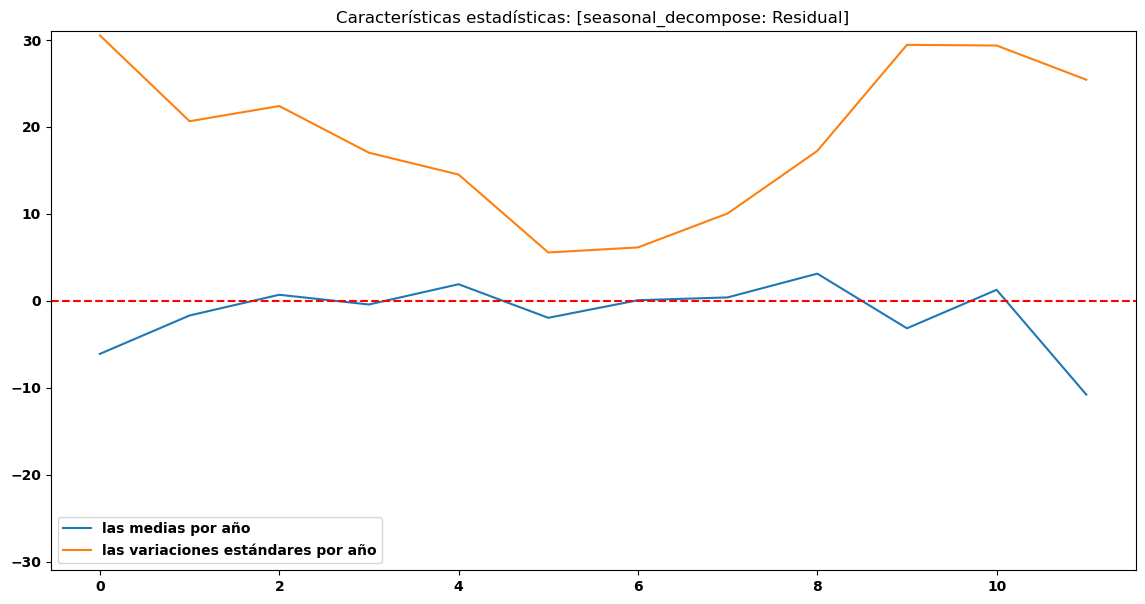

In [45]:
plt.plot(df_resid1_piv.mean().values, label='las medias por año')
plt.plot(df_resid1_piv.std().values, label='las variaciones estándares por año')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: [seasonal_decompose: Residual]")
plt.legend()
plt.ylim(-31,31)
plt.show()

Por otro lado, analizamos la evolución de las cualidades estadísticas del componente residual calculado mediante el método _STL_

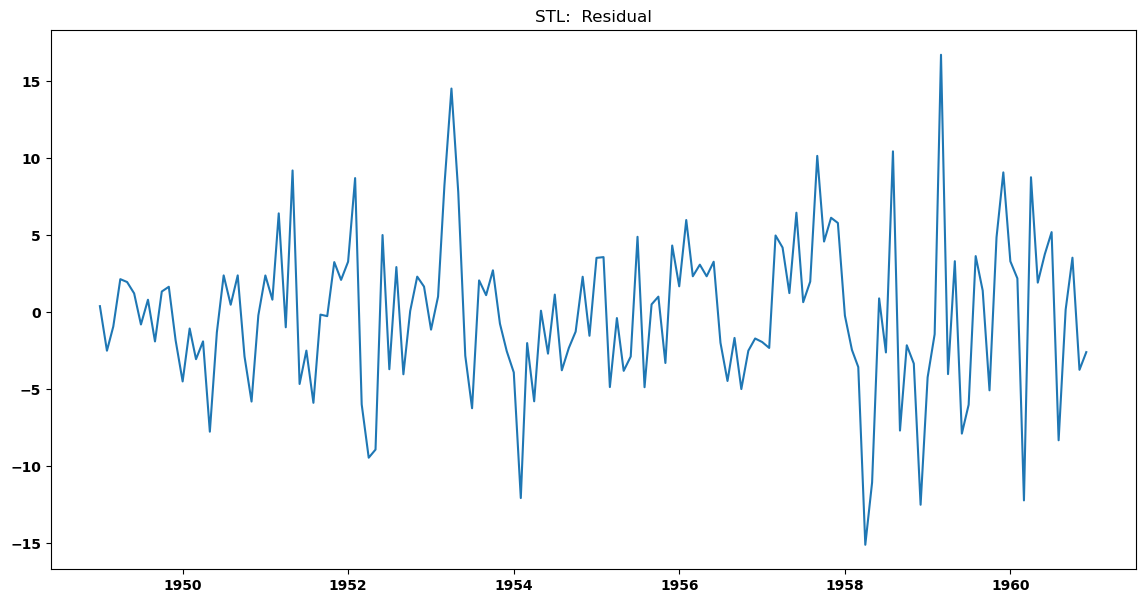

In [46]:
# Visualizamos el componente residual calculada mediante "seasonal_decompose"
plt.plot(df_air_stl.resid)
plt.title("STL:  Residual")
plt.show()

In [47]:
df_resid2 = pd.DataFrame(df_air_stl.resid)
df_resid2_piv = pd.pivot_table(df_resid2,
                               index=df_resid2.index.month,
                               columns=df_resid2.index.year)
df_resid2_piv

resid                                                                \
        1949      1950      1951      1952       1953       1954      1955   
1   0.388692 -4.502935  2.383817  3.276984  -1.137730  -3.916589  3.526783   
2  -2.506484 -1.065351  0.809209  8.711688   1.014442 -12.081428  3.576384   
3  -0.934435 -3.056240  6.418716 -5.995099   8.232474  -2.010748 -4.868884   
4   2.143853 -1.900816 -0.984647 -9.459858  14.531109  -5.794938 -0.385516   
5   1.956051 -7.769135  9.207468 -8.931712   7.805995   0.093123 -3.814865   
6   1.218765 -1.312987 -4.668251  5.011438  -2.830888  -2.696797 -2.883676   
7  -0.801732  2.388924 -2.501452 -3.709923  -6.245654   1.140483  4.896193   
8   0.805797  0.481777 -5.893072  2.929404   2.063114  -3.779125 -4.878696   
9  -1.902795  2.386984 -0.160083 -4.038689   1.103462  -2.325150  0.504386   
10  1.340356 -2.880374 -0.260069  0.075537   2.719919  -1.267165  1.007325   
11  1.648752 -5.810694  3.252047  2.306938  -0.751040   2.300199 -3.303930   
12 -1.830692 -0.207684  2.096245  1.659772  -2.536945  -1.535329  4.328842   

                                                          
        1956       1957       1958       1959       1960  
1   1.678732  -1.942768  -0.222748  -4.234108   3.304185  
2   5.986177  -2.326564  -2.451104  -1.433981   2.193415  
3   2.330944   4.981646  -3.568232  16.725203 -12.234409  
4   3.085440   4.197498 -15.118422  -4.027086   8.766614  
5   2.329919   1.237570 -11.066837   3.311023   1.918945  
6   3.276316   6.461367   0.893651  -7.892238   3.763704  
7  -1.990333   0.647002  -2.619292  -6.017385   5.198703  
8  -4.474474   1.985779  10.449942   3.641203  -8.327198  
9  -1.676507  10.155078  -7.695540   1.398313   0.163900  
10 -4.998029   4.587438  -2.153272  -5.081090   3.538341  
11 -2.504963   6.132715  -3.342907   4.862860  -3.747850  
12 -1.712560   5.795205 -12.517805   9.081611  -2.599270

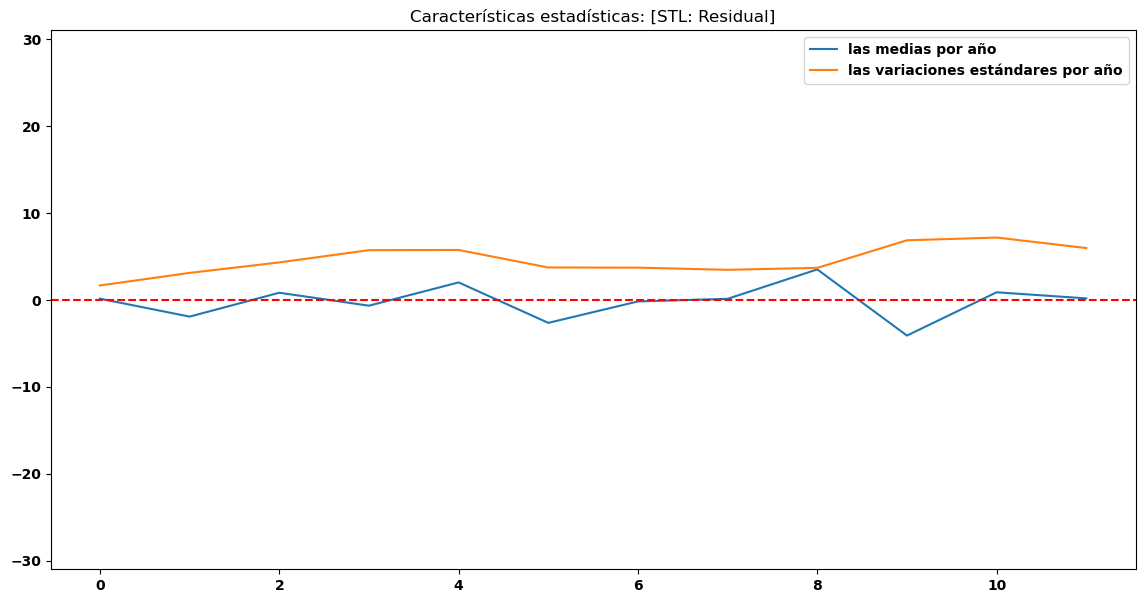

In [48]:
plt.plot(df_resid2_piv.mean().values, label='las medias por año')
plt.plot(df_resid2_piv.std().values, label='las variaciones estándares por año')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: [STL: Residual]")
plt.legend()
plt.ylim(-31,31)
plt.show()

Se puede apreciar que el componente residual obtenido por la aplicación del método _`STL`_ presenta una **estacionariedad mayor**. Podemos analizar la función de **autocorrelación** para estas dos series para confirmar que **cuál de ellas contienen menos información** que **no se haya eleminado o extraído todavía**:  

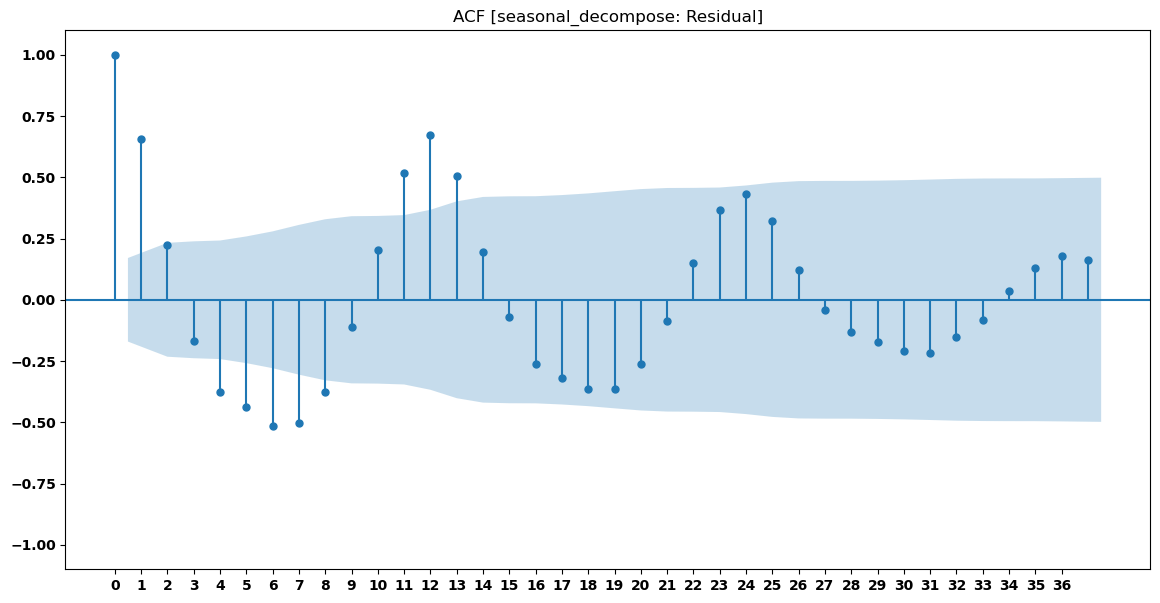

In [49]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_resid1.dropna(), lags=37)
plt.title("ACF [seasonal_decompose: Residual]")
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

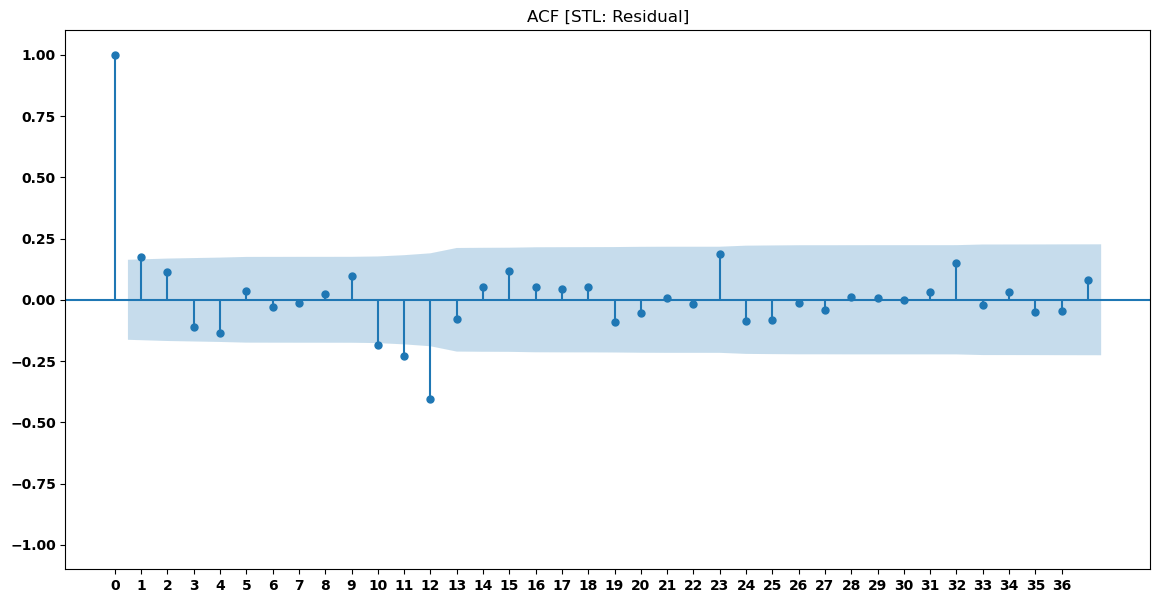

In [50]:
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(df_resid2.dropna(), lags=37)
plt.title("ACF [STL: Residual]")
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

Efectivamente estas gráficas confirman **una mayor presencia de _tendencia_ y _estacionalidad_** para la serie temporal de valores residuales calculados mediante _`seasonal_decompose`_ y por lo tanto **una menor estacionariedad** comparando con la otra serie.  

###  Rolling Window Calculations

A pesar de que el método `pivot_table()` es una función potente en la librería _pandas_ y nos permite transformar y resumir los datos de un _DataFrame_,  existen otros métods como ___rolling window calculations___ para escanear y analizar las propiedades locales que tenemos en los datos.  

**Cálculos de ventana móvil** se utiliza principalmente en el procesamiento de señales (_signal processing_) y datos de series temporales. Esta técnica consiste en **considerar una ventana** de tamaño fijo (_k_) y luego **realizar alguna operación matemática** deseada en esa ventana.

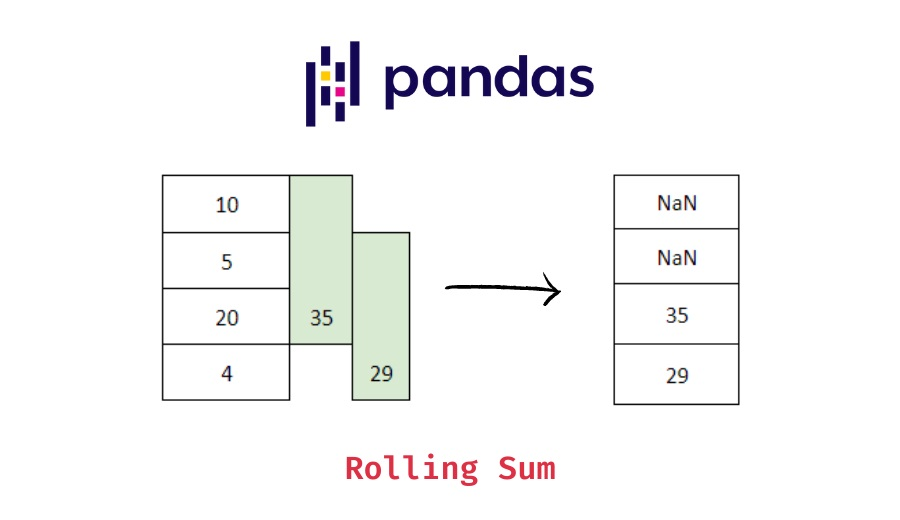

`rolling()` es un método para los _pandas.DataFrames_ o _pandas.Series_ que crea un objeto de ventana móvil que se utiliza para aplicar una función a los datos dentro de cada ventana. La clase _`Rolling`_ tiene funciones matemáticas populares como `sum()`,` mean()` y otras funciones relacionadas implementadas. Por otra parte, a través del método `apply()`, se pueden realizar operaciones matemáticas personalizadas en una ventana móvil.

Echamos un vistazo aquí en uno de los componentes residuales que hemos analizado antes sus propiedades, mediante la agrupación de los datos de cada año:

In [51]:
# La tabla poivotada de los datos residuales en columnas para cada año
df_resid1_piv

resid                                                         \
         1949       1950       1951       1952       1953       1954   
1         NaN   8.498737  12.623737  12.623737   4.915404   0.748737   
2         NaN  29.104798  26.646465  29.979798  13.688131  -6.270202   
3         NaN   8.324495  18.407828   6.199495  17.324495   4.991162   
4         NaN   6.619949   6.911616  -2.255051  20.119949   1.119949   
5         NaN  -7.910354   9.839646  -6.077020   9.422980   2.881313   
6         NaN -25.152778 -26.486111 -13.236111 -17.111111  -9.152778   
7  -42.622475 -34.747475 -36.080808 -31.872475 -25.164141  -2.330808   
8  -42.073232 -35.989899 -37.406566 -20.573232 -16.156566 -13.781566   
9   -8.478535  -4.228535  -7.978535  -9.728535  -4.478535  -4.686869   
10  11.059343   5.226010   5.809343   5.392677   7.059343  -0.607323   
11  28.593434  16.051768  21.551768  15.176768   9.135101   3.093434   
12  16.869949  13.911616  14.453283   9.244949   4.078283   0.494949   

                                                                      
         1955       1956       1957       1958       1959       1960  
1    4.915404  -1.209596  -8.501263 -10.501263 -17.792929 -14.584596  
2    2.521465  -1.228535 -15.811869 -23.728535 -28.978535 -34.186869  
3   -1.883838   0.616162   0.616162 -15.258838  -3.633838 -43.967172  
4    1.828283  -0.713384  -5.338384 -23.963384 -12.296717  -0.296717  
5   -3.993687  -1.993687  -4.993687 -13.202020   4.006313   3.756313  
6   -2.361111  11.513889  19.430556  18.638889  11.097222  24.555556  
7   14.419192  19.627525  31.710859  45.335859  53.460859        NaN  
8   -5.156566  10.343434  32.968434  58.510101  61.051768        NaN  
9    2.229798   4.021465  15.313131   0.979798   8.771465        NaN  
10  -2.523990 -10.898990  -4.773990 -10.690657 -13.315657        NaN  
11 -10.406566 -15.948232 -14.156566 -31.114899 -30.239899        NaN  
12   1.161616  -9.463384  -9.005051 -33.005051 -17.005051        NaN

In [52]:
# La media calculada por columna/año
df_resid1_piv.mean()

resid  1949    -6.108586
       1950    -1.690972
       1951     0.690972
       1952    -0.427083
       1953     1.902778
       1954    -1.958333
       1955     0.062500
       1956     0.388889
       1957     3.121528
       1958    -3.166667
       1959     1.260417
       1960   -10.787247
dtype: float64

Calculamos la media de los valores para las ventanas móviles de tamaño `12` que contienen datos por año, indicando que puede hacer estos cálculos incluso con 1 valor no nulo (_non-NA value_):

In [53]:
# El método devuelve simplemente un objeto de clase rolling
df_resid1.rolling(window=12, min_periods=1)

Rolling [window=12,min_periods=1,center=False,axis=0,method=single]

In [54]:
# El método por defecto mueve con pasos de uno la venta móvil
df_resid1.rolling(window=12, min_periods=1).mean()

,resid
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,-11.651263
1960-09-01,-13.920455
1960-10-01,-13.996054
1960-11-01,-11.675505


In [55]:
# Usamos el "Slicing" para sacar los valores de ventanas sin solapamiento o mejor dicho sin "Overlapping"
df_resid1.rolling(window=12, min_periods=1).mean().iloc[11::12]

,resid
1949-12-01,-6.108586
1950-12-01,-1.690972
1951-12-01,0.690972
1952-12-01,-0.427083
1953-12-01,1.902778
1954-12-01,-1.958333
1955-12-01,0.062500
1956-12-01,0.388889
1957-12-01,3.121528
1958-12-01,-3.166667


Vemos que **conseguimos el mismo resultado** que obtenimos anteriormente con el método `pivot_table()`: 

In [56]:
# Crear un DataFrame con los dos conjunto de valores para compararlos más fácilmente
pd.DataFrame({
    'pivot_table': df_resid1_piv.mean().values,
    'rolling_window': df_resid1.rolling(window=12, min_periods=1).mean().iloc[11::12].values.reshape(-1)
})

,pivot_table,rolling_window
0,-6.108586,-6.108586
1,-1.690972,-1.690972
2,0.690972,0.690972
3,-0.427083,-0.427083
4,1.902778,1.902778
5,-1.958333,-1.958333
6,0.062500,0.062500
7,0.388889,0.388889
8,3.121528,3.121528
9,-3.166667,-3.166667


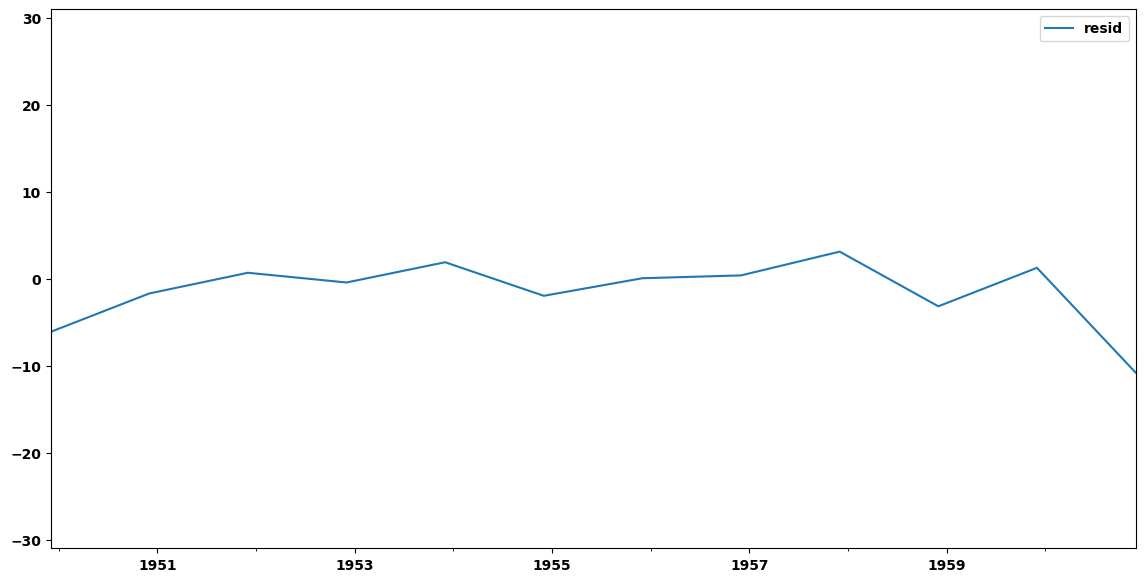

In [57]:
# Graficar las medias móviles para cada año
df_resid1.rolling(window=12, min_periods=1).mean().iloc[11::12].plot()
plt.ylim(-31,31)
plt.show()

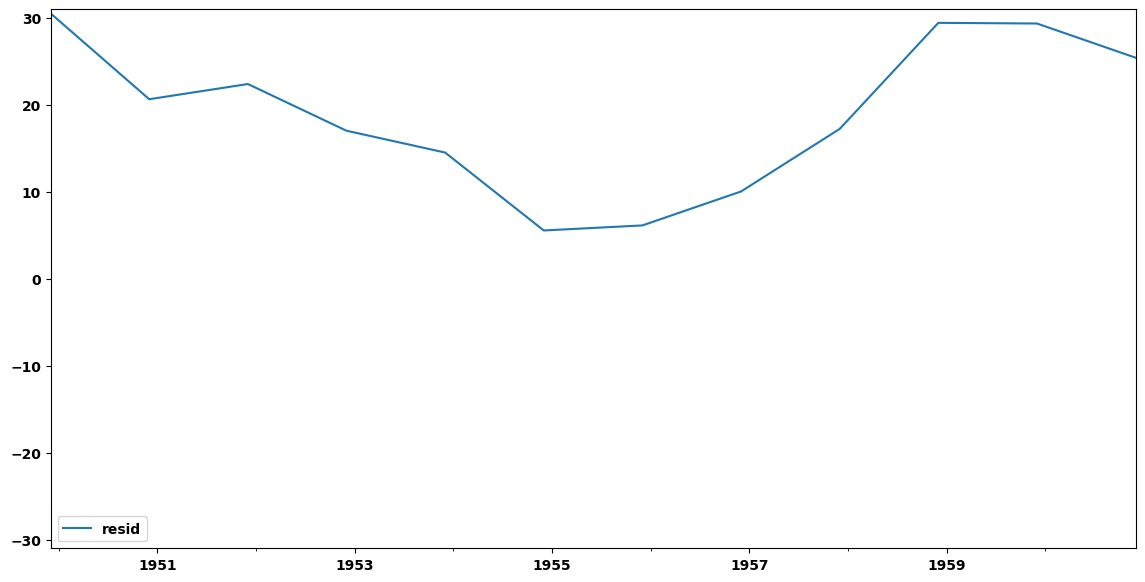

In [58]:
# Graficar la desviación estándar para cada año
df_resid1.rolling(window=12, min_periods=1).std().iloc[11::12].plot()
plt.ylim(-31,31)
plt.show()

### Ruido blanco (_White Noise_)

En el análisis de series temporales, el ruido blanco es **un tipo de proceso estocástico en el que los valores no están correlacionados y tienen una media y una varianza constantes a lo largo del tiempo**. El ruido blanco es un concepto importante porque proporciona una línea de base con la que se pueden comparar otras series temporales y también se suele utilizar como componente en modelos de series temporales más complejos.

Teóricamente, una serie de tiempo es ruido blanco si las **observaciones se distribuyen de forma independiente e idéntica con una media y una varianza constantes**. A raíz de esto, la función de autocorrelación es cero para todos los retrasos (_lags_) y la serie temporal es de tipo **`estacionaria`**.

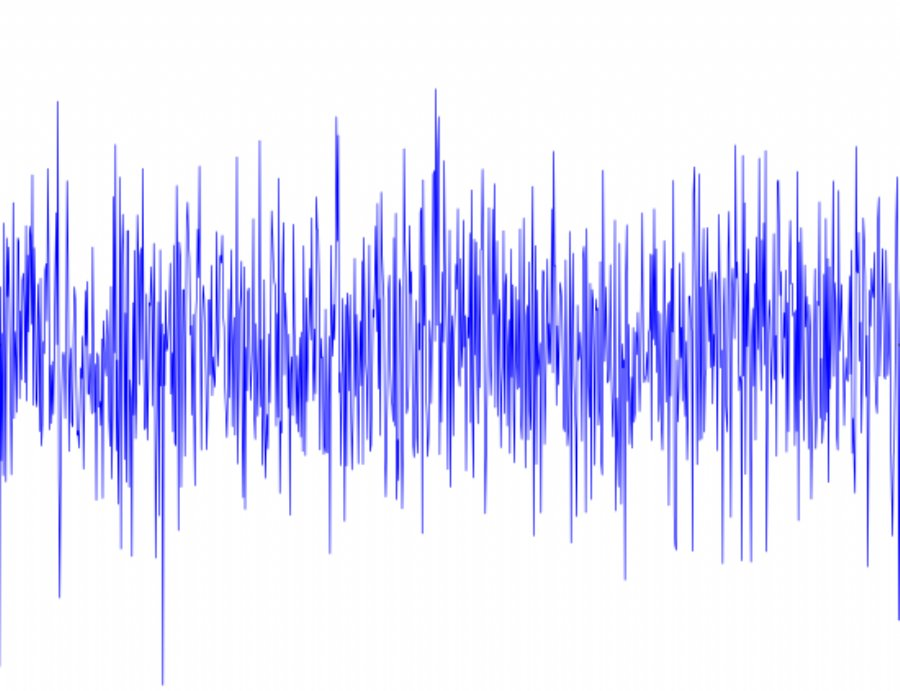


En otras palabras, los valores del ruido blanco son **aleatorios** y **no hay ninguna relación entre la observación actual y cualquier observación pasada o futura**. Las características principales del ruido blanco incluyen:

- **Media constante (cero)**: La media de una serie temporal de ruido blanco es constante e idealmente igual a cero.
- **Varianza constante**: La varianza de una serie temporal de ruido blanco es constante en el tiempo.
- **Autocorrelación cero**: La función de autocorrelación de una serie temporal de ruido blanco es igual a cero para todos los retrasos distintos a cero.
- **Distribución concreta** (_Gaussiana_ o _uniform_): Normalmente se supone que los valores de una serie temporal de ruido blanco tienen una distribución normal, aunque esto no es estrictamente necesario y se permite señales con la distribución uniforme.

En la práctica, podemos usar el ruido blanco para:
- **Agregar** a otra serie **variaciones aleatorias** que representan las mediciones y los errores presentes en datos reales, sin que estén relacionadas con ningún patrón o tendencia subyacente en los datos.

- **Considerar la hipótesis nula** en pruebas estadísticas para determinar si una serie es **significativamente diferente del ruido aleatorio** o no.

Ahora procedemos a generar el **ruido blanco** mediante la técnica de `np.random.normal` que disponemos en _numpy_: 

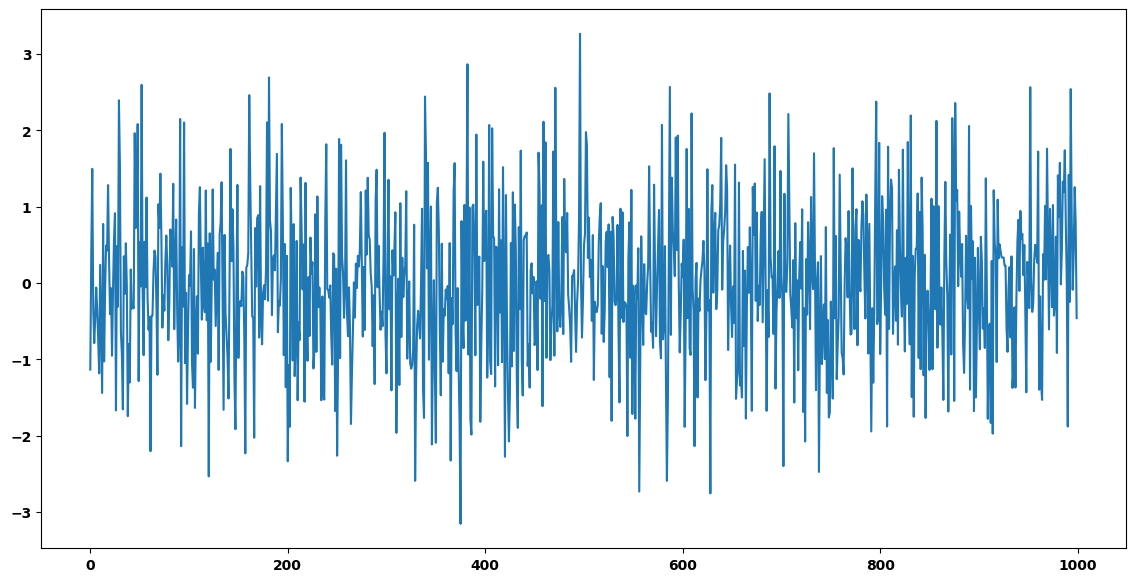

In [59]:
# Fijamos la semilla
np.random.seed(111)

# Generamos valores aleatorios con la media "0" y la varianza "1"
ruido1 = np.random.normal(loc=0, scale=1, size=1000)
pd.Series(ruido1).plot()
plt.show()

In [60]:
# Las principales propiedades de este ruido
pd.Series(ruido1).describe()

count    1000.000000
mean       -0.013786
std         1.004814
min        -3.154663
25%        -0.665006
50%        -0.044477
75%         0.617688
max         3.265844
dtype: float64

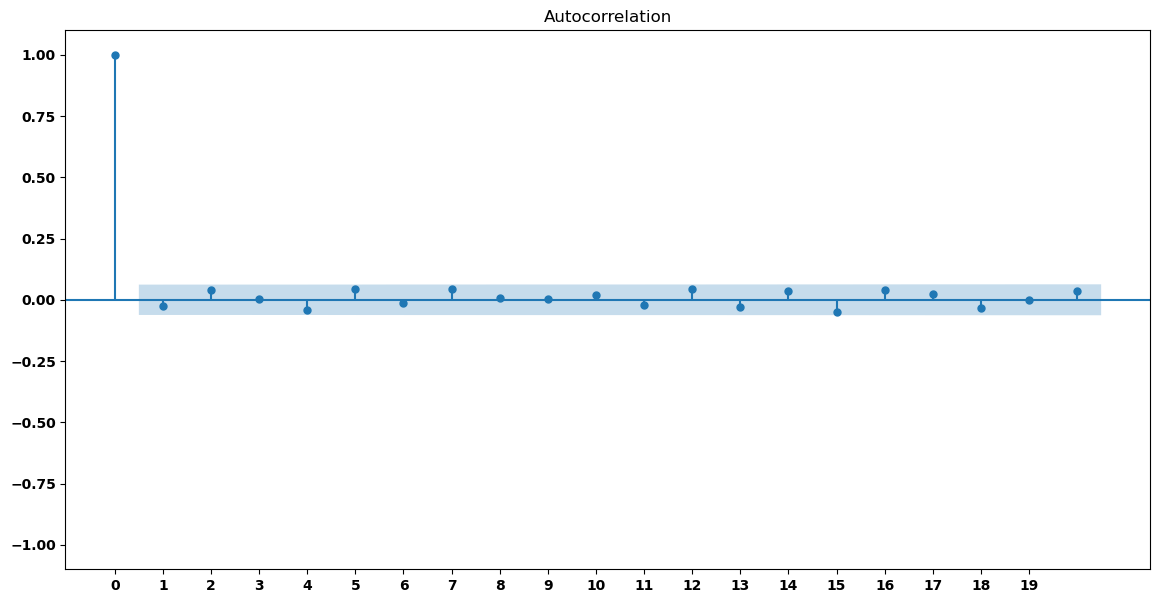

In [61]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(ruido1, lags=20)
plt.xticks(np.arange(20))
plt.ylim(-1.1,1.1)
plt.show()

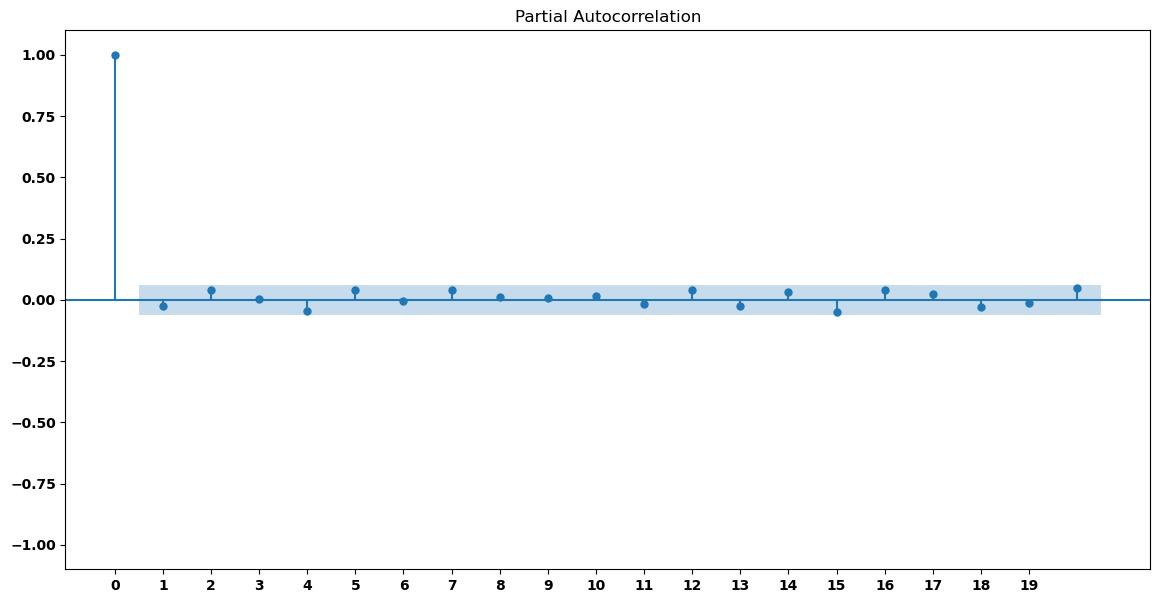

In [62]:
# Comprobamos la PACF
from statsmodels.graphics.tsaplots import plot_pacf

rcParams['figure.figsize'] = 14, 7
plot_pacf(ruido1, lags=20, method='yw')
plt.xticks(np.arange(20))
plt.ylim(-1.1,1.1)
plt.show()

Podemos usar el módulo de `random` de _python_ para crear el ruido blanco con la distribución _Gaussiana_:

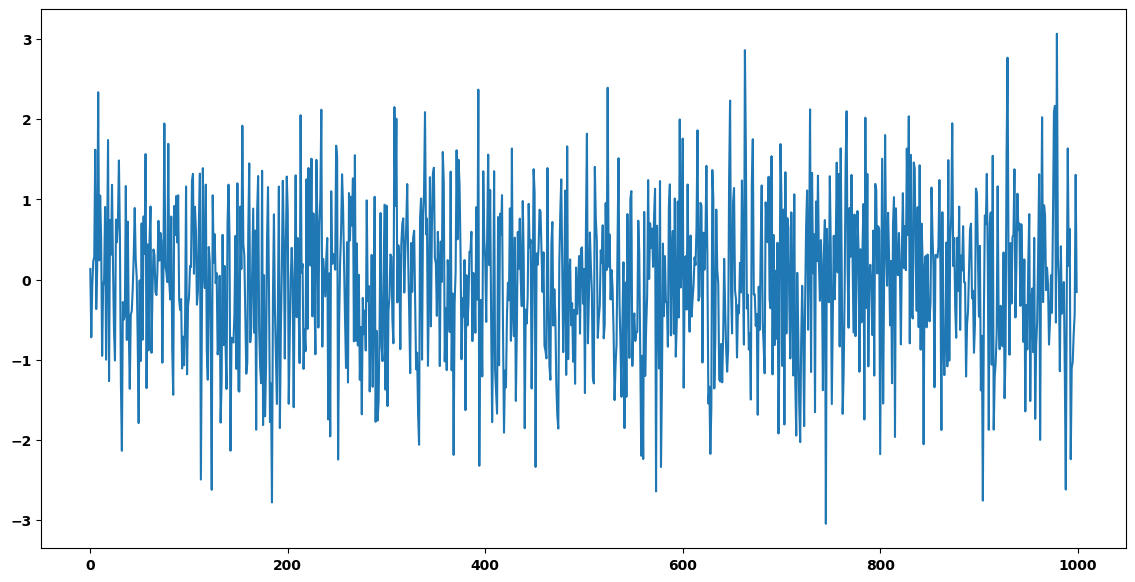

In [63]:
import random

# Fijamos la semilla
random.seed(222)

# Generar 1000 valores aleatorios con una distribución normal
ruido2 = [random.gauss(mu=0, sigma=1) for x in range(1000)]
pd.Series(ruido2).plot()
plt.show()

In [64]:
# Las principales propiedades de este ruido
pd.Series(ruido2).describe()

count    1000.000000
mean       -0.033730
std         0.979163
min        -3.046053
25%        -0.712725
50%         0.006991
75%         0.649402
max         3.064422
dtype: float64

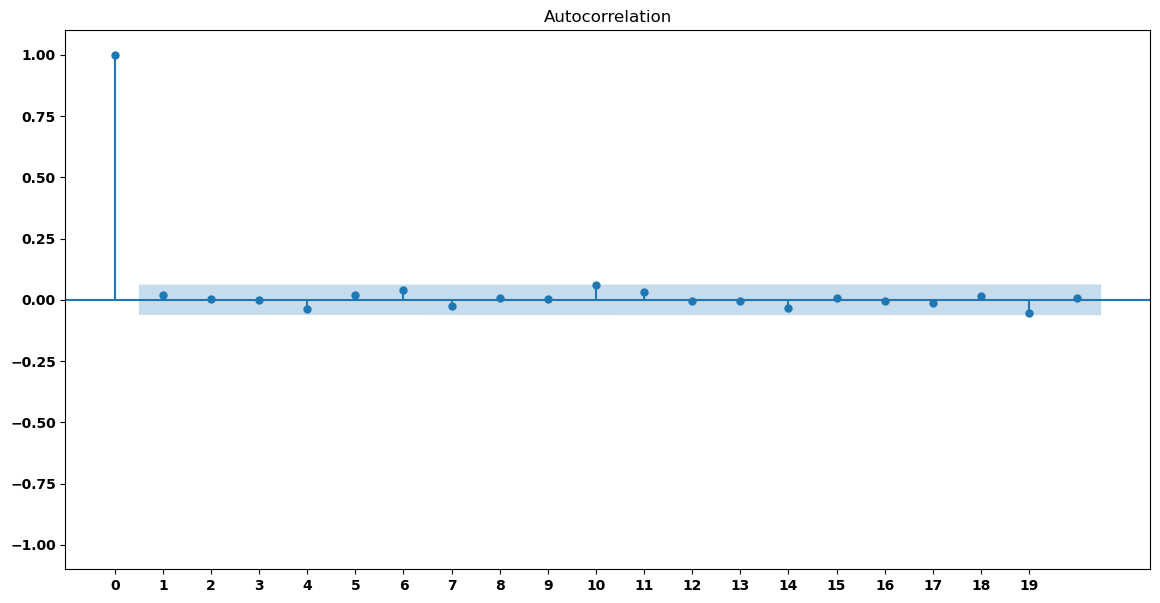

In [65]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(ruido2, lags=20)
plt.xticks(np.arange(20))
plt.ylim(-1.1,1.1)
plt.show()

Podemos generar el ruido mediante **valores distribuidos uniformemente** usando el método `np.random.rand` de _numpy_

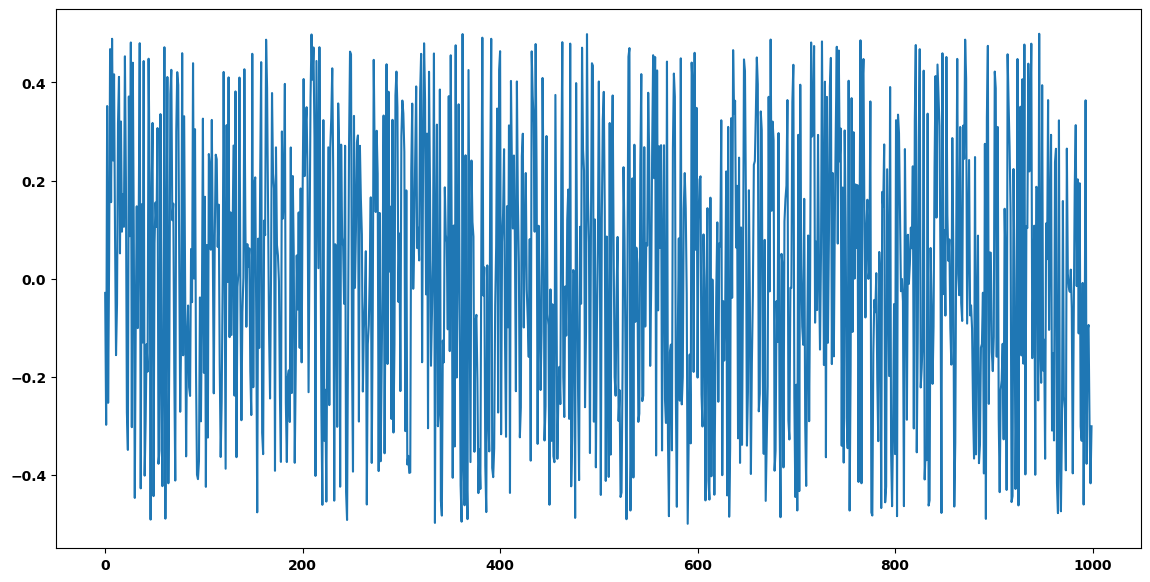

In [66]:
ruido3 = np.random.rand(1000) - 0.5

pd.Series(ruido3).plot()
plt.show()

In [67]:
# Las principales propiedades de este ruido
pd.Series(ruido3).describe()

count    1000.000000
mean        0.007724
std         0.285905
min        -0.499105
25%        -0.238694
50%         0.019205
75%         0.251935
max         0.499169
dtype: float64

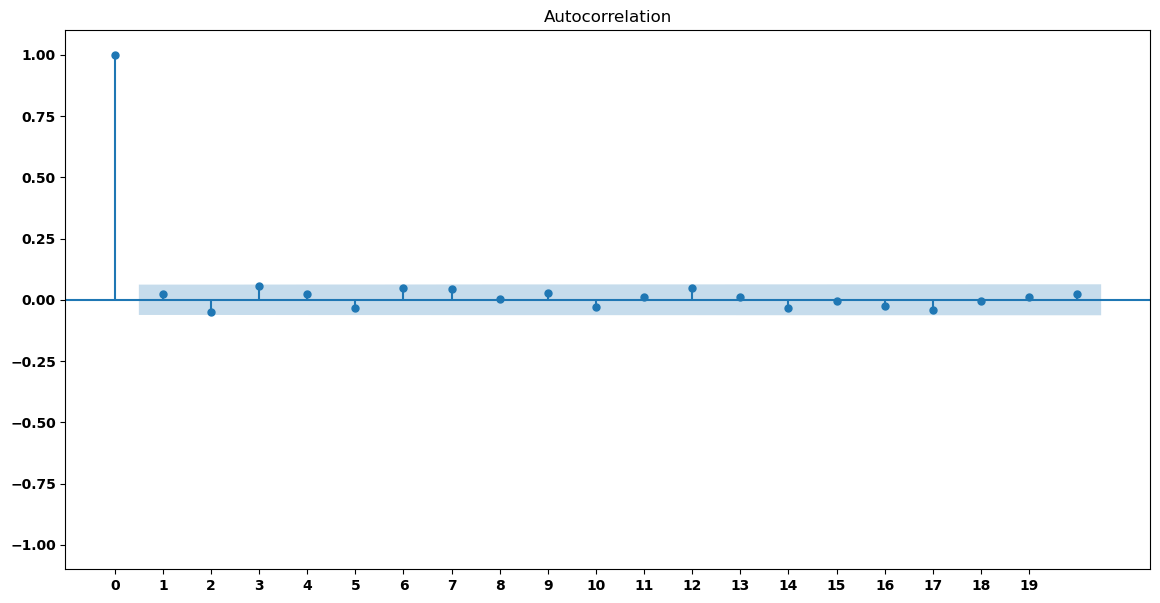

In [68]:
# Comprobamos la ACF
from statsmodels.graphics.tsaplots import plot_acf

rcParams['figure.figsize'] = 14, 7
plot_acf(ruido3, lags=20)
plt.xticks(np.arange(20))
plt.ylim(-1.1,1.1)
plt.show()

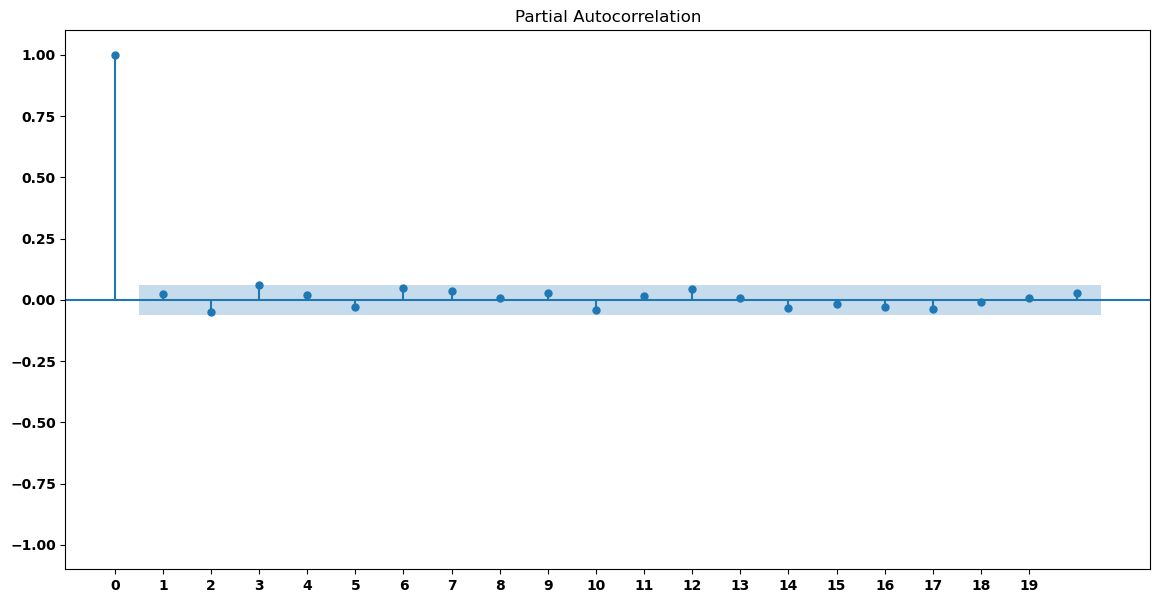

In [69]:
# Comprobamos la PACF
from statsmodels.graphics.tsaplots import plot_pacf

rcParams['figure.figsize'] = 14, 7
plot_pacf(ruido3, lags=20, method='yw')
plt.xticks(np.arange(20))
plt.ylim(-1.1,1.1)
plt.show()

Para demostrar que el **ruido** es una serie **estacionaria** (_stationary_) podemos estudiar **la evolución de sus propiedades estadísticas** y comprobar si se modifican con el paso de tiempo. 

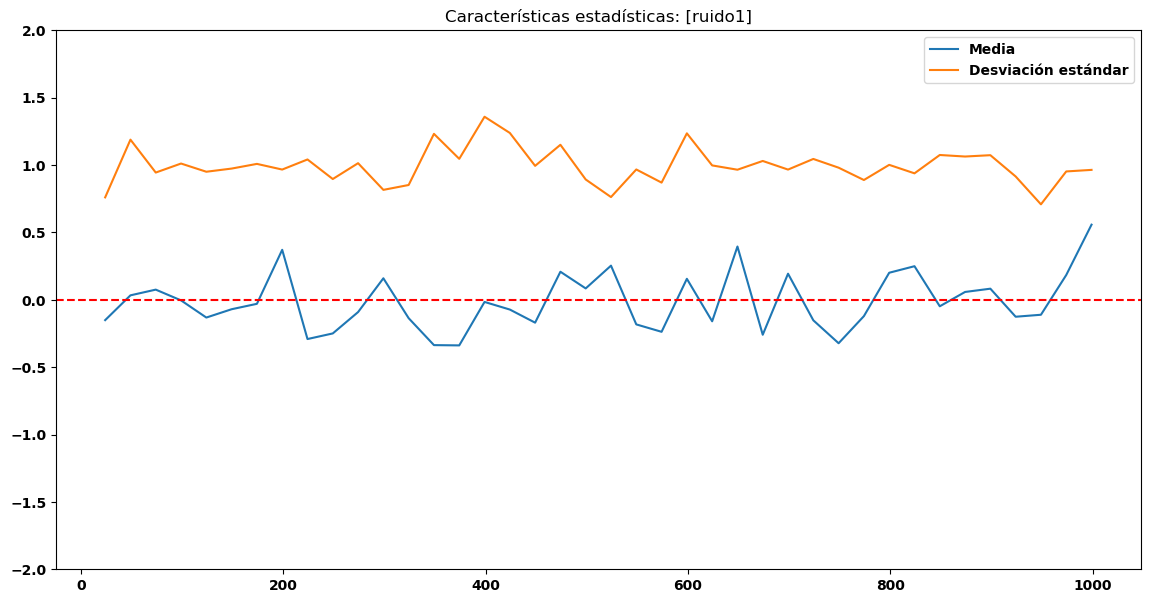

In [70]:
win = 25
ruido1_media = pd.Series(ruido1).rolling(win).mean().iloc[win-1::win]
ruido1_std = pd.Series(ruido1).rolling(win).std().iloc[win-1::win]
plt.plot(ruido1_media, label='Media')
plt.plot(ruido1_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: [ruido1]")
plt.legend()
plt.ylim(-2,2)
plt.show()

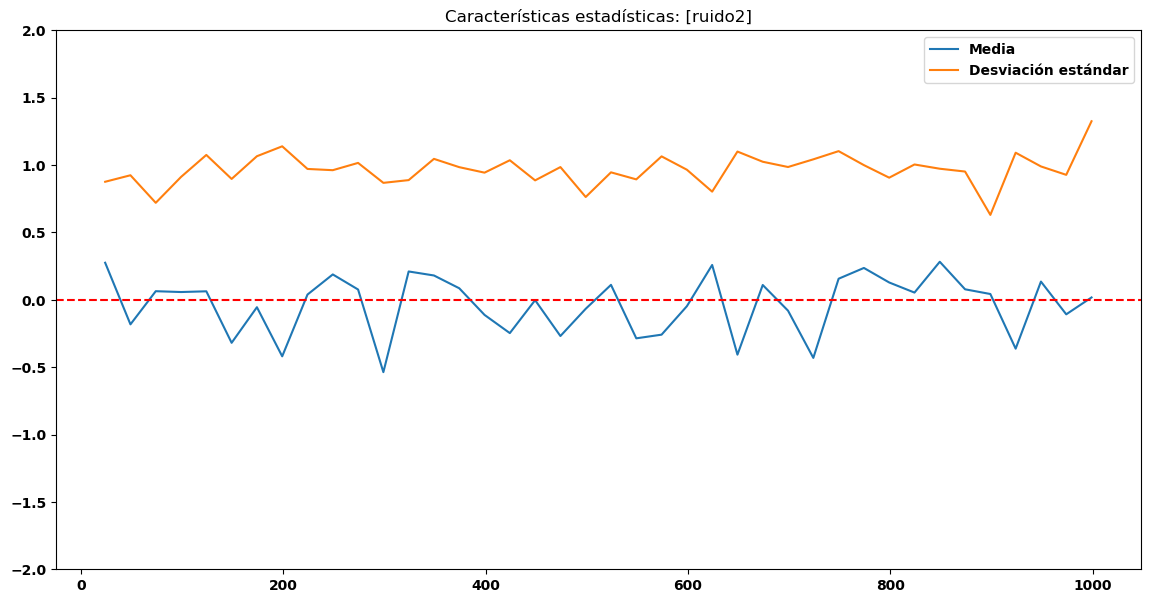

In [71]:
win = 25
ruido2_media = pd.Series(ruido2).rolling(win).mean().iloc[win-1::win]
ruido2_std = pd.Series(ruido2).rolling(win).std().iloc[win-1::win]
plt.plot(ruido2_media, label='Media')
plt.plot(ruido2_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: [ruido2]")
plt.legend()
plt.ylim(-2,2)
plt.show()

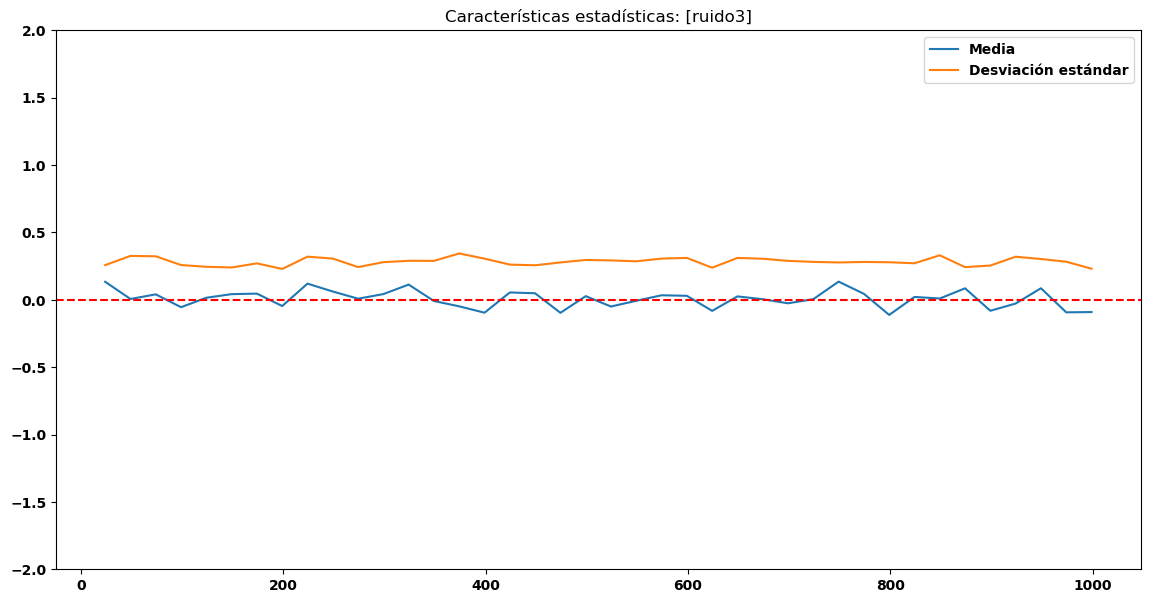

In [72]:
win = 25
ruido3_media = pd.Series(ruido3).rolling(win).mean().iloc[win-1::win]
ruido3_std = pd.Series(ruido3).rolling(win).std().iloc[win-1::win]
plt.plot(ruido3_media, label='Media')
plt.plot(ruido3_std, label='Desviación estándar')
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Características estadísticas: [ruido3]")
plt.legend()
plt.ylim(-2,2)
plt.show()

Se puede percibir que esta señal **es una serie estacionaria** al tener una media con un nivel de variación prácticamente constante que hace que sus características sean independiente del eje de tiempo. 

---

### **`Ejercicio 24.1`**

Vamos a analizar los datos de **`Sunspots Dataset`** que son números promediados mensuales de **manchas solares desde 1749 hasta 1983**. Esta serie temporal se ha recolectado en el _Observatorio Federal Suizo_ (_**Zúrich**_) hasta **1960**, luego en el _Observatorio Astronómico de Japón_ (**_Tokio_**).  

Los números de manchas solares son una *medida de la actividad solar*. Los datos vienen en las unidades originales utilizadas por los observadores de forma bruta y **no hay ajustes** por cambios en la instrumentación o sesgo del observador. 


**`24.1.1`** Utiliza el siguiente enlace para cargar estos datos y crear una tabla tipo _DataFrame_ con ellos:
 - 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'

**`24.1.2`** construye la serie temporal, del modo que las fechas tipo `'1749-05-01'` formen los índices, y los números de las manchas solares compongan los valores de la serie.

**`24.1.3`** Representa de forma gráfica los datos de la serie temporal con las siguientes visualizaciones:
 - Gráfica estática (_matplotlib_)
 - Gráfica interactiva (_plotly_)

**`24.1.4`** Aplica una descomposición de la serie temporal mediante el método `seasonal_decompose` y visualiza los componentes correspondientes.

**`24.1.5`** Aplica una descomposición de la serie temporal mediante el método `STL` y visualiza los componentes correspondientes.

**`24.1.6`** Saca la gráfica de ***correlograma*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=200`

**`24.1.7`** Saca la gráfica de ***Autocorrelación parcial*** para la serie temporal, considerando hasta el retraso indicado y analiza los patrones que ves presente en esta gráfica: 

 - `lags=30`

**`24.1.8`** Saca la gráfica de las ***Características estadísticas*** y su evolución a lo largo de tiempo de **la serie temporal**, considerando una ventana con el tamaño indicado. Analiza y explica esta evolución de la media y de la varianza de los datos: 

 - `win = 200`

---